$\qquad$ $\qquad$$\qquad$  **TDA233 / DIT382 Machine Learning: Homework 2** <br />
$\qquad$ $\qquad$$\qquad$ **Goal: Get acquainted with different classification techniques.**<br />
$\qquad$ $\qquad$$\qquad$                   **Grader: Linus Aronsson** <br />
$\qquad$ $\qquad$$\qquad$                   **Submitted by: Name, Personal no., email** <br />

---

General guidelines:
*   All solutions to theoretical and pratical problems must be submitted in this ipynb notebook, and equations wherever required, should be formatted using LaTeX math-mode.
*   All discussion regarding practical problems, along with solutions and plots should be specified in this notebook. All plots/results should be visible such that the notebook do not have to be run. But the code in the notebook should reproduce the plots/results if we choose to do so.
*   Your name, personal number and email address should be specified above.
*   All tables and other additional information should be included in this notebook.
*   All the answers for theoretical questions must be filled in the cells created for you with "Your answer here" below each question, but feel free to add more cells if needed.
*   Before submitting, make sure that your code can run on another computer. That all plots can show on another computer including all your writing. It is good to check if your code can run here: https://colab.research.google.com.
* Upload both the .ipynb and the generatable .html file (that can be exported through File > Download As > HTML).

### General comments:
* **Throughout this assignment, feel free to use any *NumPy*-functions where you see fit.**
* **For the practical tasks there are comments marked with "TODO" in all parts that you need to change.**
* **Please note the slight changes in the notation from the lectures:**

  * Here, the dataset is represented as $\{(\mathbf{x}_n, y_n)\}_{n=1}^N$, where $x_n$ are vectors with attributes of dimension $D$ and $y_n$ is the associated labels ($y_n \in \{0,1\}$ for binary prediction). In the lectures, $t_n$ was instead used for the labels.

# 0. Dataset
**Run the code cell below to produce the dataset and some helper functions.**

In [17]:
from sklearn.datasets import make_gaussian_quantiles
import numpy as np
from matplotlib import pyplot as plt

# Randomly generate data from two different distributions
data_class1, _ = make_gaussian_quantiles(mean = [1,1], cov = 1.5, n_samples = 30, n_features=2, random_state=18)
data_class2, _ = make_gaussian_quantiles(mean = [-1,-1], cov= 0.75,n_samples = 8, n_features=2, random_state=4)

# Concatenate the data, and add labels
X_train = np.append(data_class1, data_class2, axis=0)
y_train = np.append(np.zeros(len(data_class1), dtype=np.int32), 
                   np.ones(len(data_class2), dtype=np.int32))

# Consider new test point
X_test = np.array([[-0.6,-0.4]])

def plot_data(X_train, y_train, X_test, title = ''):
    # Plot the two data classes
    fig, ax = plt.subplots(figsize=(10,10))
    ax.plot(X_train[y_train == 0][:,0], X_train[y_train == 0][:,1], 'o', markersize=8)
    ax.plot(X_train[y_train == 1][:,0], X_train[y_train == 1][:,1], 's', markersize=8)

    # Plot test point (circles to help with distances)
    ax.plot(X_test[:,0], X_test[:,1], '*', markersize=10)

    plt.axis('square')
    ax.legend(['Class 0','Class 1','test point'])
    ax.grid()
    ax.set_title(title, fontsize=15);
    return fig, ax

def decision_boundary(model, fig, ax, levels = [0.1,0.5,0.9], labels = True):
    # Code for producing the plot
    X1 = np.linspace(*ax.get_xlim(),100)
    X2 = np.linspace(*ax.get_ylim(), 100)
    Z = np.zeros(X1.shape+X2.shape)

    for i,x1 in enumerate(X1):
        for j,x2 in enumerate(X2):
            _, y_prob = model.predict(np.array([x1,x2]).reshape(1,-1))
            Z[j,i] = y_prob[0,0]
            
    contours = ax.contour(X1,X2,Z, levels=levels)
    if labels:
        ax.clabel(contours, inline=1, fontsize=10)
        
    return fig, ax

# 1. K-Nearest-Neighbour Classification (3 pts)
A KNN classifier assigns a test instance to the majority class associated with its $K$ nearest training instances. Distance between instances is measured using Euclidean distance. Suppose we have the following training set of two classes (circles and squares) and a single test instance (star). Assume “unweighted” KNN (every nearest neighbor contributes equally to the final vote).

**Run the code in the cell below.**

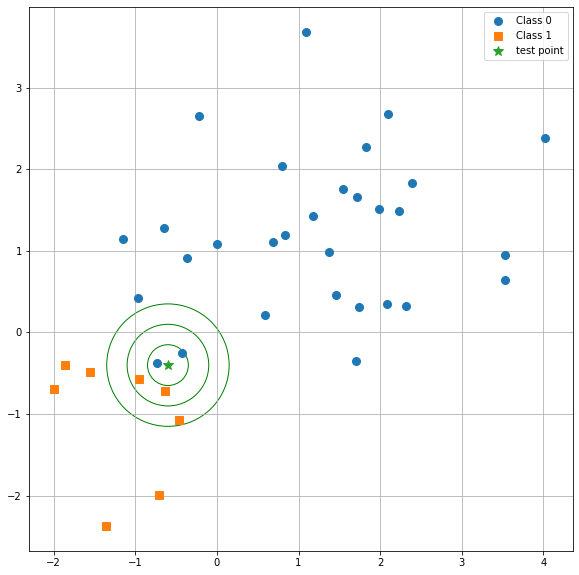

In [2]:
fig, ax = plot_data(X_train, y_train, X_test)

# Circles added to help visualize distance to points.
for r in np.arange(0.25,1,0.25):
    c = plt.Circle(X_test[0], r, color='g', fill=False)
    ax.add_artist(c)

### 1.1 Exercise 1 (1 pts)
a) What would be the class assigned to this test instance for $K=2$, $K=4$, $K=5$ and why? (**0.5 pt**)

b) The classification result is affected by the increasing $K$. What will be the maxinum value of K in this case? Why? (**0.5 pt**)<br />
(***Hint:*** After $K$ reaches a certain value, it is impossible for the classification results to change. Find this value!)




#### Your answer here:
a)
$K=2$ would classify the point as Class 0, since the two closest points are both of that class. For $K=4$ we have two of each class and since they are unweighted they contribute equally, so this will result in a tie. The algorithm cant decide which class to go with. For $K=5$ there are three neighbors of class 1, and only two of class 0, meaning the point is classified as class 1.

b)
There are only 8 points of class 1, so if $K > 16$ there will always be more neighbors of class 0 than of class 1.

### 1.2 Exercise 2 (2 pts)
In this task, we are going to complete a custom implementation of the unweighted K-Nearest-Neighbor classifier. A skeleton of the implementation can be found below, and the only function that is not finished is `predict(self, X_test)`.

In total, the algorithm stores three variables:
* `self.X_train`, `self.y_train`: All training data with labels.
* `self.n_neighbors`: Number of neighbors, i.e. $K$.

Your task is to finish the implementation of `predict(self, X_test)`. The distances between all test- and training instances have already been computed. In the loop below, the variable `dist_i` is an array containing the distances between test sample $i$ and all training points in `self.X_train`. Your task is to compute `y_pred_prob[i]`, which is an array with the probability for selecting each class in the dataset, e.g. for binary prediction we have $[1,0]$ (class 0), $[0,1]$ (class 1), or $[0.5,0.5]$ (tie).

Finish this implementation and verify your results in Exercise 1 by running the implementation for the aforementioned values of $K$ (2, 4, and 5).
<br />
***Hint:*** `np.unique` might be of interest.

In [3]:
from sklearn.metrics.pairwise import euclidean_distances
class K_Nearest_Neighbors(): 
    """
    Custom implementation of K-nearest-neighbors.
    
    Note: If two or more classes have the same amount of neighbors, the prediction 
    will be random, i.e. tiebreaks are resolved randomly.
    """
    
    def __init__(self, n_neighbors):
        """
        Parameter(s):
            n_neighbors - Number of neighbors
        """
        self.n_neighbors = n_neighbors
        
    def fit(self, X_train, y_train):
        """
        No training required. Store data and labels.
        --------------------
        Input(s):
            X_train   - Data of size (n_samples, n_features)
            y_train   - True labels of size (n_samples,1)
        --------------------
        Output(s)
        """
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        """
        Prediction of test data.
        --------------------
        Input(s):
            X_test   - Data of size (n_samples, n_features)
        --------------------
        Output(s)
            y_pred - Predicted labels of size (n_samples,)
            y_pred_prob - Probabilistic labels of size (n_samples,n_classes)
        """
        n_samples = X_test.shape[0]
        unique_classes = np.unique(self.y_train)
        n_classes = len(unique_classes)

        y_pred = np.zeros(shape=(n_samples,), dtype=np.int32)
        y_pred_prob = np.zeros(shape=(n_samples, n_classes), dtype=np.float32)
        
        # Computes distances between all points in X_test and X_train.
        dist = euclidean_distances(X_test,self.X_train)
        
        for i in range(n_samples):
            dist_i = dist[i]

            ###
            ids = np.argpartition(dist_i, self.n_neighbors)
            
            if np.mean(self.y_train[ids[0:self.n_neighbors]]) < 0.5:
                y_pred_prob[i,:] = [1,0]
                
            elif np.mean(self.y_train[ids[0:self.n_neighbors]]) > 0.5:
                y_pred_prob[i,:] = [0,1]
                
            elif np.mean(self.y_train[ids[0:self.n_neighbors]]) == 0.5:
                y_pred_prob[i,:] = [0.5,0.5]
            ### 
            
            # Selects the prediction randomly, based on y_pred_prob[i]. 
            y_pred[i] = np.random.choice(unique_classes, p=y_pred_prob[i])
        
        return y_pred, y_pred_prob

#### Run the code below after finishing the above implementation (no need to change anything).
Make sure that you understand the plot and that your implementation produces sensible results.

*Note:* What happens when $K$ is even?

Train accuracy: 100.000 %
Predicted test class, K=3: 0


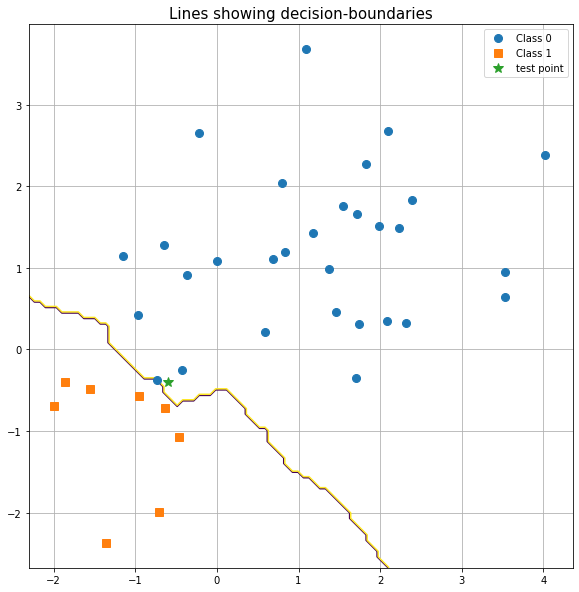

In [4]:
# Parameters (feel free to change)
K = 3

# Define and train the model
model = K_Nearest_Neighbors(n_neighbors = K)
model.fit(X_train, y_train)

# Predictions
y_pred_train,_ = model.predict(X_train)
print("Train accuracy: %.3f %%" %(np.mean(y_pred_train == y_train)*100))
y_pred_test,_ = model.predict(X_test)
print("Predicted test class, K=%d: %d" %(K, y_pred_test))

# Plot decision-boundaries
fig, ax = plot_data(X_train, y_train, X_test, title = 'Lines showing decision-boundaries')
fig, ax = decision_boundary(model, fig, ax, levels=[0.4, 0.6], labels = False)

# 2. Naive Bayes Classifier (4 pts)

The Bayes classifier refers to a classifier using the predicitive probability:
$$
P(y_{n} = c | x_{n}, X, y) = \frac{p(x_{n}|y_{n} = c, X, y)P(y_{n} = c | X, y)}{p(x_{n}|X,y)}, \tag{1}
$$
where $X,y$ is the training data, $x_{n}$ a new test instance and $c$ its corresponding class.

Assume that the class-conditional densities are Gaussian, that is
$$
    p(x_{n}|y_{n} = c, X, y) = \mathcal{N}(\mu_{c}, \Sigma_{c}).
$$

Furthermore, assume a class size prior, i.e. the prior is set using the proportion of training points in class $c$:
$$
    P(y_{n} = c |X, y ) = \frac{N_c}{N}, \tag{2}
$$
where $N_c$ is the number of training objects belonging to class $c$, and $N$ is the total number of training objects.


### Exercise  2.1 (3 pts)
We consider a **binary** classification problem with **real valued data**, i.e. $x_n = [x_{n1}, x_{n2}]^T \in \mathbb{R}^2$ and $c=\{0,1\}$.


#### 1.  (1 pts)
In order to simplify the problem, we use the Naive Bayes assumption,
$$
    p(x_{n}|y_{n} = c, X, y) = \prod_{d=1}^2 p(x_{nd}|y_n = c, X, y) = \prod_{d=1}^2 \mathcal{N}(\mu_{cd}, \sigma_{cd}^2),
$$
which assumes that the two attributes of $x_n$ are independent of one another, i.e. the covariance matrix $\Sigma_{c}$ is diagonal.

Using this assumption, write the expression for the **naive Bayes** classifier, that is, derive
$$
P(y_{n} = c | x_{n} , X, y ).
$$

***HINT:*** Derive the maximum likelihood estimates for the parameters $\mu_{c}, \Sigma_{c}$. Then express eq. 1 in terms of those estimates. 

#### 2. (2 pts)
Derive the maximum likelihood estimate for $\mu_{c}, \Sigma_{c}$ when the covariance matrix is not diagonal, i.e, $\Sigma_{c}$ has 4 unknown scalars. This alleviates the "naive" assumption, since the feature components are no longer independent of one another.

***HINT:***
When deriving the MLE for $\Sigma_{c}$ it might be a good idea to consider $\partial /\partial \Sigma_{c}^{-1}$. Also, feel free to use the following properties:
$$
    \frac{\partial\ x^T A x}{\partial A} = x x^T, \qquad
    \frac{\partial\ x^T A x}{\partial x} = 2Ax, \qquad
    \frac{\partial\ \log |A|}{\partial A} = A^{-T},
$$
for a symmetric matrix $A$ and a vector $x$ that does not depend on $A$.

#### Your answer here:

1) 

$$
P(y_{n} = c | x_{n}, X, y) = \frac{p(x_{n}|y_{n} = c, X, y)P(y_{n} = c | X, y)}{p(x_{n}|X,y)} = \frac{N_c\prod_{d=1}^2 \mathcal{N}(\mu_{cd}, \sigma_{cd}^2)}{Np(x_{n}|X,y)}
$$

Since the two attributes are independent we get the following expressions for the MLE estimates for $\mu_c$:

$$
\mu_{cd} = \frac{1}{N_c} \sum_{n:y_n = c} (x_{nd}) 
$$

For $\Sigma_c$, we know that the attributes are independent so we get the following on the diagonal:

$$
 \sigma_{cd}^2 = \frac{1}{N_c} \sum_{n:y_n = c} (x_{nd}-\mu_{cd})^2 
$$

Now we express eq. (1) in terms of these estimates. Lets start with just the product of gaussians:

$$
\prod_{d=1}^2 \mathcal{N}(\mu_{cd}, \sigma_{cd}^2) = \frac{1}{\sigma_{c1} \sqrt{2\pi}}\exp \left( -\frac{(x-\mu_{c1})^2}{2\sigma_{c1}^2} \right)  \frac{1}{\sigma_{c2} \sqrt{2\pi}}\exp\left(-\frac{(x-\mu_{c2})^2}{2\sigma_{c2}^2}\right)  
$$

$$
\prod_{d=1}^2 \mathcal{N}(\mu_{cd}, \sigma_{cd}^2) = \frac{1}{2\pi\sigma_{c1}\sigma_{c2}}\exp -\left(\frac{(x-\mu_{c1})^2}{2\sigma_{c1}^2} + \frac{(x-\mu_{c2})^2}{2\sigma_{c2}^2} \right)
$$

Inserting back into eq. (1) gives:
$$
P(y_{n} = c | x_{n}, X, y) = \frac{N_c}{2N\pi\sigma_{c1}\sigma_{c2}p(x_{n}|X,y)}\exp -\left(\frac{(x-\mu_{c1})^2}{2\sigma_{c1}^2} + \frac{(x-\mu_{c2})^2}{2\sigma_{c2}^2} \right)
$$

Ska man lägga in alla sigma & summor eller lämna det så här?

### Exercise  2.2 (1 pts)
Here, you will finish a custom implementation of a Gaussian Naive Bayes classifier.

The most important variables stored by the algorithm are:
* `self.mean`, and `self.std`: Dictionaries containing MLE for each class. (`self.mean[c]`$ =[\mu_{c1}, \mu_{c2}]$, and `self.std[c]`$ =[\sigma_{c1}, \sigma_{c2}]$)
* `self.prior`: Dictionary containing prior probability of each class. 

Use your calculations from Exercise 2.1.1 and complete the unfinished function `predict(self, X_test)`. The 1-D Gaussian density function `gaussian_density(self, x, mu, std)` is already implemented and may be used.

In [40]:
class GaussianNaiveBayes(): 
    """
    Custom implementation of a Gaussian Naive Bayes classifier.
    The parameters are estimated using MLE.
    """
    
    def __init__(self):
        """
        Parameter(s):
        """
        self.mean = {}
        self.std = {}
        self.prior = {}
        self.unique_classes = 0
        
    def get_class_parameters(self, X_class):
        """
        Estimating the MLE of the parameters.
        --------------------
        Input(s):
            X_class - Data points corresponding to a single class
        --------------------
        Output(s):
            mean_MLE - MLE of mean
            std_MLE  - MLE of scale
        """
        
        mean_MLE = np.mean(X_class, axis=0)
        std_MLE = np.std(X_class, axis=0)
        
        return mean_MLE, std_MLE
            
    def fit(self, X_train, y_train):
        """
        Compute model parameters using maximum likelihood estimates and a class size prior.
        --------------------
        Input(s):
            X_train   - Data of size (n_samples, n_features)
            y_train   - True labels of size (n_samples,1)
        --------------------
        Output(s)
        """
        
        # Compute mean, variance and prior of each class
        self.unique_classes = np.unique(y_train)
        for uc in self.unique_classes:
            X_class = X_train[y_train == uc]
            c_mean, c_std = self.get_class_parameters(X_class)
            self.mean[uc] = c_mean
            self.std[uc] = c_std
            self.prior[uc] = X_class.shape[0]/X_train.shape[0]
            
    def gaussian_density(self, x, mu, std):
        """
        1-D Gaussian density function.
        --------------------
        Input(s):
            x   - Data point
            mu  - mean
            std - scale
        --------------------
        Output(s):- 
            N(mu, std^2)

        """
        return 1/(std*np.sqrt(2*np.pi))*np.exp(-(1/2)*((x-mu)/std)**2)

    def predict(self, X_test):
        """
        Prediction of test data.
        --------------------
        Input(s):
            X_test   - Data of size (n_samples, n_features)
        --------------------
        Output(s)
            y_pred - Predicted labels of size (n_samples,)
            y_pred_prob - Probabilistic labels of size (n_samples,n_classes)
        """
        
        n_samples = X_test.shape[0]
        y_pred_prob = np.zeros(shape=(n_samples,len(self.unique_classes)), dtype=np.float32)
        
        ### TODO - Change this part
        for i in range(n_samples):
            print(X_test[i])
            print(f'prior: {self.prior}')
            print(f'mean: {self.mean}')
            print(f'std: {self.std}')
            print(X_test[i][0])
            like=np.zeros(2)
            nominator = np.zeros(2)
            for c in self.unique_classes:
                term_0 = self.gaussian_density(X_test[i][0],self.mean[c][0],self.std[c][0])
                term_1 = self.gaussian_density(X_test[i][1],self.mean[c][1],self.std[c][1])
                like[c] = term_0 * term_1
                nominator[c] = like[c]*self.prior[c]
            scaled = nominator/np.sum(nominator)
            print(f'nominator: {nominator}')
            print(f'scaled: {scaled[0]: .2f}, {scaled[1]: .2f}')
            y_pred_prob[i,:] = scaled # Always predicts class 0 currently
        ###
        
        
        y_pred = np.argmax(y_pred_prob, axis=-1)
        return y_pred, y_pred_prob

#### Run the code below after finishing the above implementation (no need to change anything).
Make sure that you understand the plot and that your implementation produces sensible results.

[0.79159144 2.04185137]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.7915914425947025
nominator: [6.35696223e-02 6.62276709e-09]
scaled:  1.00,  0.00
[2.39461838 1.82925655]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.394618384013677
nominator: [5.34839058e-02 8.34339506e-15]
scaled:  1.00,  0.00
[-0.73080805 -0.3715843 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.7308080533707708
nominator: [0.00878907 0.03891184]
scaled:  0.18,  0.82
[2.09596887 2.67883119]
prior: {0: 0.789473

[-2.30279418 -2.6750203 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-2.3027941781737256
nominator: [7.09718118e-07 7.03291806e-04]
scaled:  0.00,  1.00
[-2.30279418 -2.6077456 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-2.3027941781737256
nominator: [9.47269246e-07 8.79689534e-04]
scaled:  0.00,  1.00
[-2.30279418 -2.5404709 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-2.3027941781737256
nominator: [1.25794231e-06 1.09005142e-03]
scaled:  0.00,  1.00
[-2.30279418 -2.47319619]
pr

std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-2.3027941781737256
nominator: [0.00180267 0.00221599]
scaled:  0.45,  0.55
[-2.30279418  0.28506662]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-2.3027941781737256
nominator: [0.00193505 0.00185131]
scaled:  0.51,  0.49
[-2.30279418  0.35234132]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-2.3027941781737256
nominator: [0.00206666 0.0015322 ]
scaled:  0.57,  0.43
[-2.30279418  0.41961602]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-2.3027941781737256
nominator: [8.49708136e-04 5.51462619e-09]
scaled:  1.00,  0.00
[-2.30279418  2.77423062]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-2.3027941781737256
nominator: [7.56199818e-04 3.25540794e-09]
scaled:  1.00,  0.00
[-2.30279418  2.84150532]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-2.3027941781737256
nominator: [6.69580969e-04 1.90378741e-09]
scaled:  1.00,  0.00
[-2.30279418  2.90878002]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228,

std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-2.235519475457965
nominator: [2.32778922e-05 7.89642458e-03]
scaled:  0.00,  1.00
[-2.23551948 -1.73317446]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-2.235519475457965
nominator: [2.90889353e-05 8.74243422e-03]
scaled:  0.00,  1.00
[-2.23551948 -1.66589976]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-2.235519475457965
nominator: [3.61669378e-05 9.58866064e-03]
scaled:  0.00,  1.00
[-2.23551948 -1.59862506]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.9

std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-2.235519475457965
nominator: [0.003482   0.00013098]
scaled:  0.96,  0.04
[-2.23551948  1.15963775]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-2.235519475457965
nominator: [3.49946666e-03 9.68561570e-05]
scaled:  0.97,  0.03
[-2.23551948  1.22691246]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-2.235519475457965
nominator: [3.49924717e-03 7.09531407e-05]
scaled:  0.98,  0.02
[-2.23551948  1.29418716]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]

[-2.23551948  3.31242824]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-2.235519475457965
nominator: [2.83009798e-04 4.35812476e-11]
scaled:  1.00,  0.00
[-2.23551948  3.37970294]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-2.235519475457965
nominator: [2.40638952e-04 2.36429812e-11]
scaled:  1.00,  0.00
[-2.23551948  3.44697765]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-2.235519475457965
nominator: [2.03577664e-04 1.27065752e-11]
scaled:  1.00,  0.00
[-2.23551948  3.51425235]
prior

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-2.1682447727422045
nominator: [0.00067414 0.01470832]
scaled:  0.04,  0.96
[-2.16824477 -0.52222982]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-2.1682447727422045
nominator: [0.000769   0.01375281]
scaled:  0.05,  0.95
[-2.16824477 -0.45495511]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-2.1682447727422045
nominator: [0.00087278 0.01273924]
scaled:  0.06,  0.94
[-2.16824477 -0.38768041]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array(

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-2.1682447727422045
nominator: [1.51962401e-03 4.04287539e-08]
scaled:  1.00,  0.00
[-2.16824477  2.57240651]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-2.1682447727422045
nominator: [1.37310490e-03 2.45475761e-08]
scaled:  1.00,  0.00
[-2.16824477  2.63968121]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-2.1682447727422045
nominator: [1.23444296e-03 1.47655819e-08]
scaled:  1.00,  0.00
[-2.16824477  2.70695592]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228,

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-2.100970070026444
nominator: [8.71780640e-05 1.85127508e-02]
scaled:  0.00,  1.00
[-2.10097007 -1.39680095]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-2.100970070026444
nominator: [0.00010622 0.01955651]
scaled:  0.01,  0.99
[-2.10097007 -1.32952625]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-2.100970070026444
nominator: [0.00012876 0.02046611]
scaled:  0.01,  0.99
[-2.10097007 -1.26225155]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: a

std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-2.100970070026444
nominator: [0.00438962 0.00036052]
scaled:  0.92,  0.08
[-2.10097007  1.02508835]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-2.100970070026444
nominator: [0.00445657 0.00027165]
scaled:  0.94,  0.06
[-2.10097007  1.09236305]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-2.100970070026444
nominator: [0.00450168 0.00020277]
scaled:  0.96,  0.04
[-2.10097007  1.15963775]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.5

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-2.100970070026444
nominator: [1.28153249e-04 1.49404836e-12]
scaled:  1.00,  0.00
[-2.10097007  3.78335116]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-2.100970070026444
nominator: [1.05704268e-04 7.66142218e-13]
scaled:  1.00,  0.00
[-2.10097007  3.85062586]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-2.100970070026444
nominator: [8.67471395e-05 3.89204477e-13]
scaled:  1.00,  0.00
[-2.10097007  3.91790056]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.

nominator: [0.00427229 0.00156851]
scaled:  0.73,  0.27
[-2.03369537  0.68871483]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-2.033695367310684
nominator: [0.00444873 0.00123863]
scaled:  0.78,  0.22
[-2.03369537  0.75598954]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-2.033695367310684
nominator: [0.00460904 0.00096899]
scaled:  0.83,  0.17
[-2.03369537  0.82326424]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-2.033695367310684
nominator: [0.004751   0.00075097]
scaled:  0.86,  0.14

nominator: [6.53969104e-04 4.85842781e-10]
scaled:  1.00,  0.00
[-2.03369537  3.17787883]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-2.033695367310684
nominator: [5.64576070e-04 2.71098587e-10]
scaled:  1.00,  0.00
[-2.03369537  3.24515354]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-2.033695367310684
nominator: [4.84939369e-04 1.49858867e-10]
scaled:  1.00,  0.00
[-2.03369537  3.31242824]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-2.033695367310684
nominator: [4.14430929e-04 8.20

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.9664206645949232
nominator: [0.00033822 0.03257096]
scaled:  0.01,  0.99
[-1.96642066 -0.99315273]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.9664206645949232
nominator: [0.00039974 0.03252318]
scaled:  0.01,  0.99
[-1.96642066 -0.92587803]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.9664206645949232
nominator: [0.00047007 0.03217209]
scaled:  0.01,  0.99
[-1.96642066 -0.85860333]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array(

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.9664206645949232
nominator: [0.00550494 0.00069082]
scaled:  0.89,  0.11
[-1.96642066  0.95781364]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.9664206645949232
nominator: [0.00561729 0.00052543]
scaled:  0.91,  0.09
[-1.96642066  1.02508835]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.9664206645949232
nominator: [0.00570296 0.0003959 ]
scaled:  0.94,  0.06
[-1.96642066  1.09236305]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array(

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.9664206645949232
nominator: [6.37846763e-04 3.24819281e-10]
scaled:  1.00,  0.00
[-1.96642066  3.24515354]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.9664206645949232
nominator: [5.47874809e-04 1.79554789e-10]
scaled:  1.00,  0.00
[-1.96642066  3.31242824]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.9664206645949232
nominator: [4.68215783e-04 9.83276995e-11]
scaled:  1.00,  0.00
[-1.96642066  3.37970294]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228,

nominator: [0.00181327 0.02257266]
scaled:  0.07,  0.93
[-1.89914596 -0.253131  ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.8991459618791628
nominator: [0.00202694 0.02032853]
scaled:  0.09,  0.91
[-1.89914596 -0.1858563 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.8991459618791628
nominator: [0.00225434 0.01813647]
scaled:  0.11,  0.89
[-1.89914596 -0.1185816 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.8991459618791628
nominator: [0.00249458 0.01602962]
scaled:  0.13,  0

[-1.89914596  3.44697765]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.8991459618791628
nominator: [3.79539595e-04 3.38350070e-11]
scaled:  1.00,  0.00
[-1.89914596  3.51425235]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.8991459618791628
nominator: [3.19463340e-04 1.80142521e-11]
scaled:  1.00,  0.00
[-1.89914596  3.58152705]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.8991459618791628
nominator: [2.67537527e-04 9.50145020e-12]
scaled:  1.00,  0.00
[-1.89914596  3.64880175]
pr

[-1.83187126  0.48689073]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.8318712591634023
nominator: [0.00555339 0.00402006]
scaled:  0.58,  0.42
[-1.83187126  0.55416543]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.8318712591634023
nominator: [0.00584162 0.00323475]
scaled:  0.64,  0.36
[-1.83187126  0.62144013]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.8318712591634023
nominator: [0.00611376 0.00257853]
scaled:  0.70,  0.30
[-1.83187126  0.68871483]
prior: {0: 0.7894736842105

[-1.76459656 -2.6750203 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.7645965564476418
nominator: [1.90319382e-06 3.17295529e-03]
scaled:  0.00,  1.00
[-1.76459656 -2.6077456 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.7645965564476418
nominator: [2.54021552e-06 3.96878727e-03]
scaled:  0.00,  1.00
[-1.76459656 -2.5404709 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.7645965564476418
nominator: [3.37332241e-06 4.91785118e-03]
scaled:  0.00,  1.00
[-1.76459656 -2.47319619]
pr

nominator: [0.00809865 0.00062203]
scaled:  0.93,  0.07
[-1.76459656  1.09236305]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.7645965564476418
nominator: [0.00818062 0.00046431]
scaled:  0.95,  0.05
[-1.76459656  1.15963775]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.7645965564476418
nominator: [0.00822165 0.00034334]
scaled:  0.96,  0.04
[-1.76459656  1.22691246]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.7645965564476418
nominator: [0.00822114 0.00025152]
scaled:  0.97,  0

nominator: [6.11573630e-05 3.15743808e-02]
scaled:  0.00,  1.00
[-1.69732185 -1.73317446]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.6973218537318813
nominator: [7.64245560e-05 3.49572068e-02]
scaled:  0.00,  1.00
[-1.69732185 -1.66589976]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.6973218537318813
nominator: [9.50203964e-05 3.83408997e-02]
scaled:  0.00,  1.00
[-1.69732185 -1.59862506]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.6973218537318813
nominator: [0.00011754 0.041

std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.6973218537318813
nominator: [0.00914816 0.00052373]
scaled:  0.95,  0.05
[-1.69732185  1.15963775]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.6973218537318813
nominator: [0.00919405 0.00038729]
scaled:  0.96,  0.04
[-1.69732185  1.22691246]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.6973218537318813
nominator: [0.00919348 0.00028371]
scaled:  0.97,  0.03
[-1.69732185  1.29418716]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([

std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.6300471510161207
nominator: [6.82158229e-05 3.50820014e-02]
scaled:  0.00,  1.00
[-1.63004715 -1.73317446]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.6300471510161207
nominator: [8.52450746e-05 3.88406280e-02]
scaled:  0.00,  1.00
[-1.63004715 -1.66589976]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.6300471510161207
nominator: [0.00010599 0.04260022]
scaled:  0.00,  1.00
[-1.63004715 -1.59862506]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.945163

[-1.63004715  1.83238478]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.6300471510161207
nominator: [8.15941916e-03 1.25542627e-05]
scaled:  1.00,  0.00
[-1.63004715  1.89965948]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.6300471510161207
nominator: [7.75585013e-03 8.37283510e-06]
scaled:  1.00,  0.00
[-1.63004715  1.96693419]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.6300471510161207
nominator: [7.33498642e-03 5.53194121e-06]
scaled:  1.00,  0.00
[-1.63004715  2.03420889]
pr

[-1.56277245 -2.33864679]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.5627724483003604
nominator: [1.06347495e-05 1.21316195e-02]
scaled:  0.00,  1.00
[-1.56277245 -2.27137209]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.5627724483003604
nominator: [1.38392806e-05 1.44787516e-02]
scaled:  0.00,  1.00
[-1.56277245 -2.20409738]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.5627724483003604
nominator: [1.79184114e-05 1.71185567e-02]
scaled:  0.00,  1.00
[-1.56277245 -2.13682268]
pr

[-1.56277245 -0.0513069 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.5627724483003604
nominator: [0.00480302 0.02562891]
scaled:  0.16,  0.84
[-1.56277245  0.01596781]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.5627724483003604
nominator: [0.00526128 0.02223044]
scaled:  0.19,  0.81
[-1.56277245  0.08324251]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.5627724483003604
nominator: [0.00573415 0.01910248]
scaled:  0.23,  0.77
[-1.56277245  0.15051721]
prior: {0: 0.7894736842105

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.5627724483003604
nominator: [6.63737665e-04 6.17844084e-11]
scaled:  1.00,  0.00
[-1.56277245  3.51425235]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.5627724483003604
nominator: [5.58676498e-04 3.28949218e-11]
scaled:  1.00,  0.00
[-1.56277245  3.58152705]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.5627724483003604
nominator: [4.67868796e-04 1.73501214e-11]
scaled:  1.00,  0.00
[-1.56277245  3.64880175]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228,

prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.4954977455846
nominator: [0.0063633  0.02059364]
scaled:  0.24,  0.76
[-1.49549775  0.15051721]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.4954977455846
nominator: [0.00690016 0.01753067]
scaled:  0.28,  0.72
[-1.49549775  0.21779191]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.4954977455846
nominator: [0.0074445  0.01478385]
scaled:  0.33,  0.67
[-1.49549775  0.28506662]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: 

-1.4282230428688394
nominator: [1.69992100e-05 1.65754423e-02]
scaled:  0.00,  1.00
[-1.42822304 -2.20409738]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.4282230428688394
nominator: [2.20097306e-05 1.95975217e-02]
scaled:  0.00,  1.00
[-1.42822304 -2.13682268]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.4282230428688394
nominator: [2.83530940e-05 2.29541321e-02]
scaled:  0.00,  1.00
[-1.42822304 -2.06954798]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.4282230428688394
nominato

[-1.42822304  0.62144013]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.4282230428688394
nominator: [0.01168401 0.0046367 ]
scaled:  0.72,  0.28
[-1.42822304  0.68871483]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.4282230428688394
nominator: [0.01216653 0.00366154]
scaled:  0.77,  0.23
[-1.42822304  0.75598954]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.4282230428688394
nominator: [0.01260496 0.00286446]
scaled:  0.81,  0.19
[-1.42822304  0.82326424]
prior: {0: 0.7894736842105

prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.360948340153079
nominator: [1.44222443e-05 1.45274801e-02]
scaled:  0.00,  1.00
[-1.36094834 -2.27137209]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.360948340153079
nominator: [1.87680476e-05 1.73381447e-02]
scaled:  0.00,  1.00
[-1.36094834 -2.20409738]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.360948340153079
nominator: [2.42999335e-05 2.04992821e-02]
scaled:  0.00,  1.00
[-1.36094834 -2.13682268]
prior: {0: 0.7894736842105263, 

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.360948340153079
nominator: [0.01471229 0.00178282]
scaled:  0.89,  0.11
[-1.36094834  0.95781364]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.360948340153079
nominator: [0.01501253 0.001356  ]
scaled:  0.92,  0.08
[-1.36094834  1.02508835]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.360948340153079
nominator: [0.01524149 0.00102172]
scaled:  0.94,  0.06
[-1.36094834  1.09236305]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.2936736374373186
nominator: [1.21429776e-05 1.24247065e-02]
scaled:  0.00,  1.00
[-1.29367364 -2.33864679]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.2936736374373186
nominator: [1.58822380e-05 1.49683793e-02]
scaled:  0.00,  1.00
[-1.29367364 -2.27137209]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.2936736374373186
nominator: [2.06679760e-05 1.78643457e-02]
scaled:  0.00,  1.00
[-1.29367364 -2.20409738]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228,

std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.2936736374373186
nominator: [0.01220493 0.009592  ]
scaled:  0.56,  0.44
[-1.29367364  0.48689073]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.2936736374373186
nominator: [0.0129036  0.00779099]
scaled:  0.62,  0.38
[-1.29367364  0.55416543]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.2936736374373186
nominator: [0.01357332 0.00626903]
scaled:  0.68,  0.32
[-1.29367364  0.62144013]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([

nominator: [1.74453244e-05 1.51916961e-02]
scaled:  0.00,  1.00
[-1.22639893 -2.27137209]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.226398934721558
nominator: [2.27020616e-05 1.81308681e-02]
scaled:  0.00,  1.00
[-1.22639893 -2.20409738]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.226398934721558
nominator: [2.9393499e-05 2.1436537e-02]
scaled:  0.00,  1.00
[-1.22639893 -2.13682268]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.226398934721558
nominator: [3.78649176e-05 2.5108

[-1.22639893  1.89965948]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.226398934721558
nominator: [1.41548757e-02 1.14751015e-05]
scaled:  1.00,  0.00
[-1.22639893  1.96693419]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.226398934721558
nominator: [1.33867750e-02 7.58161195e-06]
scaled:  1.00,  0.00
[-1.22639893  2.03420889]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.226398934721558
nominator: [1.25963758e-02 4.96238281e-06]
scaled:  1.00,  0.00
[-1.22639893  2.10148359]
prior

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.1591242320057975
nominator: [8.60297171e-05 3.81253776e-02]
scaled:  0.00,  1.00
[-1.15912423 -1.86772387]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.1591242320057975
nominator: [0.0001086  0.04300992]
scaled:  0.00,  1.00
[-1.15912423 -1.80044917]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.1591242320057975
nominator: [0.0001364  0.04806698]
scaled:  0.00,  1.00
[-1.15912423 -1.73317446]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1

[-1.15912423  0.28506662]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.1591242320057975
nominator: [0.01294215 0.01434243]
scaled:  0.47,  0.53
[-1.15912423  0.35234132]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.1591242320057975
nominator: [0.01382237 0.01187023]
scaled:  0.54,  0.46
[-1.15912423  0.41961602]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.1591242320057975
nominator: [0.01468785 0.00973238]
scaled:  0.60,  0.40
[-1.15912423  0.48689073]
prior: {0: 0.7894736842105

prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.1591242320057975
nominator: [3.94532918e-03 8.54472499e-09]
scaled:  1.00,  0.00
[-1.15912423  2.97605473]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.1591242320057975
nominator: [3.45819325e-03 4.90409087e-09]
scaled:  1.00,  0.00
[-1.15912423  3.04332943]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.1591242320057975
nominator: [3.01588664e-03 2.78832004e-09]
scaled:  1.00,  0.00
[-1.15912423  3.11060413]
prior: {0: 0.789473684210526

prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.091849529290037
nominator: [0.00554339 0.05589686]
scaled:  0.09,  0.91
[-1.09184953 -0.32040571]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.091849529290037
nominator: [0.00622808 0.05081441]
scaled:  0.11,  0.89
[-1.09184953 -0.253131  ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.091849529290037
nominator: [0.00696197 0.04576253]
scaled:  0.13,  0.87
[-1.09184953 -0.1858563 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}


nominator: [1.60278826e-02 7.46389474e-06]
scaled:  1.00,  0.00
[-1.09184953  2.03420889]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.091849529290037
nominator: [1.50815438e-02 4.88533351e-06]
scaled:  1.00,  0.00
[-1.09184953  2.10148359]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.091849529290037
nominator: [1.41193656e-02 3.16771880e-06]
scaled:  1.00,  0.00
[-1.09184953  2.16875829]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.091849529290037
nominator: [1.31517732e-02 2.03

[-1.02457483 -0.58950452]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.0245748265742767
nominator: [0.00413305 0.06821875]
scaled:  0.06,  0.94
[-1.02457483 -0.52222982]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.0245748265742767
nominator: [0.00471465 0.06378699]
scaled:  0.07,  0.93
[-1.02457483 -0.45495511]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.0245748265742767
nominator: [0.00535093 0.05908594]
scaled:  0.08,  0.92
[-1.02457483 -0.38768041]
prior: {0: 0.7894736842105

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.0245748265742767
nominator: [1.00163362e-03 2.07475311e-11]
scaled:  1.00,  0.00
[-1.02457483  3.64880175]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.0245748265742767
nominator: [8.34588336e-04 1.08408610e-11]
scaled:  1.00,  0.00
[-1.02457483  3.71607646]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-1.0245748265742767
nominator: [6.91887479e-04 5.61157565e-12]
scaled:  1.00,  0.00
[-1.02457483  3.78335116]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228,

scaled:  0.23,  0.77
[-0.95730012 -0.0513069 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.9573001238585161
nominator: [0.01117945 0.02928286]
scaled:  0.28,  0.72
[-0.95730012  0.01596781]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.9573001238585161
nominator: [0.0122461  0.02539987]
scaled:  0.33,  0.67
[-0.95730012  0.08324251]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.9573001238585161
nominator: [0.01334673 0.02182594]
scaled:  0.38,  0.62
[-0.95730012  0.15051721]
prior

nominator: [2.51309691e-03 4.42134621e-10]
scaled:  1.00,  0.00
[-0.95730012  3.31242824]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.9573001238585161
nominator: [2.14770166e-03 2.42121530e-10]
scaled:  1.00,  0.00
[-0.95730012  3.37970294]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.9573001238585161
nominator: [1.82615825e-03 1.31351788e-10]
scaled:  1.00,  0.00
[-0.95730012  3.44697765]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.9573001238585161
nominator: [1.54490795e-03 7

nominator: [0.02590253 0.00269066]
scaled:  0.91,  0.09
[-0.89002542  0.82326424]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.8900254211427556
nominator: [0.02670032 0.00208526]
scaled:  0.93,  0.07
[-0.89002542  0.89053894]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.8900254211427556
nominator: [0.0273836  0.00160098]
scaled:  0.94,  0.06
[-0.89002542  0.95781364]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.8900254211427556
nominator: [0.02794244 0.00121769]
scaled:  0.96,  0

nominator: [3.66282935e-04 3.29831296e-13]
scaled:  1.00,  0.00
[-0.82275072 -2.6750203 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.8227507184269953
nominator: [7.21118168e-06 4.33886150e-03]
scaled:  0.00,  1.00
[-0.82275072 -2.6077456 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.8227507184269953
nominator: [9.62485029e-06 5.42712288e-03]
scaled:  0.00,  1.00
[-0.82275072 -2.5404709 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.8227507184269953
nominator: [1.27814837e-05 6

[-0.82275072  0.89053894]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.8227507184269953
nominator: [0.02962026 0.00148423]
scaled:  0.95,  0.05
[-0.82275072  0.95781364]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.8227507184269953
nominator: [0.03022475 0.00112889]
scaled:  0.96,  0.04
[-0.82275072  1.02508835]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.8227507184269953
nominator: [0.03068571 0.0008506 ]
scaled:  0.97,  0.03
[-0.82275072  1.09236305]
prior: {0: 0.7894736842105

[-0.82275072  3.37970294]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.8227507184269953
nominator: [2.14213368e-03 1.14608254e-10]
scaled:  1.00,  0.00
[-0.82275072  3.44697765]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.8227507184269953
nominator: [1.81221937e-03 6.15945335e-11]
scaled:  1.00,  0.00
[-0.82275072  3.51425235]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.8227507184269953
nominator: [1.52536826e-03 3.27938297e-11]
scaled:  1.00,  0.00
[-0.82275072  3.58152705]
pr

nominator: [0.00736284 0.04498254]
scaled:  0.14,  0.86
[-0.75547602 -0.38768041]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.7554760157112348
nominator: [0.00831427 0.0412781 ]
scaled:  0.17,  0.83
[-0.75547602 -0.32040571]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.7554760157112348
nominator: [0.00934121 0.03752487]
scaled:  0.20,  0.80
[-0.75547602 -0.253131  ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.7554760157112348
nominator: [0.01044195 0.03379421]
scaled:  0.24,  0

std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.7554760157112348
nominator: [2.71812194e-03 1.92918451e-10]
scaled:  1.00,  0.00
[-0.75547602  3.37970294]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.7554760157112348
nominator: [2.31117800e-03 1.04658943e-10]
scaled:  1.00,  0.00
[-0.75547602  3.44697765]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.7554760157112348
nominator: [1.95522883e-03 5.62474213e-11]
scaled:  1.00,  0.00
[-0.75547602  3.51425235]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 

scaled:  0.23,  0.77
[-0.68820131 -0.253131  ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.6882013129954743
nominator: [0.01123717 0.03039833]
scaled:  0.27,  0.73
[-0.68820131 -0.1858563 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.6882013129954743
nominator: [0.01249784 0.02712043]
scaled:  0.32,  0.68
[-0.68820131 -0.1185816 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.6882013129954743
nominator: [0.01382971 0.02396995]
scaled:  0.37,  0.63
[-0.68820131 -0.0513069 ]
prior

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.6882013129954743
nominator: [2.10413167e-03 5.05952863e-11]
scaled:  1.00,  0.00
[-0.68820131  3.51425235]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.6882013129954743
nominator: [1.77107459e-03 2.69376697e-11]
scaled:  1.00,  0.00
[-0.68820131  3.58152705]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.6882013129954743
nominator: [1.48320278e-03 1.42080240e-11]
scaled:  1.00,  0.00
[-0.68820131  3.64880175]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228,

nominator: [0.01951233 0.01386038]
scaled:  0.58,  0.42
[-0.62092661  0.15051721]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.6209266102797137
nominator: [0.02115855 0.01179887]
scaled:  0.64,  0.36
[-0.62092661  0.21779191]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.6209266102797137
nominator: [0.02282772 0.00995015]
scaled:  0.70,  0.30
[-0.62092661  0.28506662]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.6209266102797137
nominator: [0.02450411 0.0083127 ]
scaled:  0.75,  0

std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.6209266102797137
nominator: [9.07097205e-04 1.74602821e-12]
scaled:  1.00,  0.00
[-0.62092661  3.85062586]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.6209266102797137
nominator: [7.44417322e-04 8.86991972e-13]
scaled:  1.00,  0.00
[-0.62092661  3.91790056]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.6209266102797137
nominator: [6.07825411e-04 4.46387285e-13]
scaled:  1.00,  0.00
[-0.62092661  3.98517527]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.5536519075639532
nominator: [0.04136069 0.00040331]
scaled:  0.99,  0.01
[-0.55365191  1.15963775]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.5536519075639532
nominator: [0.04156816 0.00029824]
scaled:  0.99,  0.01
[-0.55365191  1.22691246]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.5536519075639532
nominator: [0.04156555 0.00021848]
scaled:  0.99,  0.01
[-0.55365191  1.29418716]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array(

std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.4863772048481929
nominator: [0.00014679 0.01455971]
scaled:  0.01,  0.99
[-0.4863772  -1.93499857]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.4863772048481929
nominator: [0.00018624 0.01657997]
scaled:  0.01,  0.99
[-0.4863772  -1.86772387]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.4863772048481929
nominator: [0.0002351  0.01870416]
scaled:  0.01,  0.99
[-0.4863772  -1.80044917]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([

nominator: [3.17510119e-02 3.29616940e-06]
scaled:  1.00,  0.00
[-0.4863772   2.03420889]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.4863772048481929
nominator: [2.98763279e-02 2.15743756e-06]
scaled:  1.00,  0.00
[-0.4863772   2.10148359]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.4863772048481929
nominator: [2.79702664e-02 1.39891279e-06]
scaled:  1.00,  0.00
[-0.4863772   2.16875829]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.4863772048481929
nominator: [2.60534794e-02 8

nominator: [0.01035874 0.02277986]
scaled:  0.31,  0.69
[-0.4191025  -0.38768041]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.4191025021324324
nominator: [0.01169731 0.02090388]
scaled:  0.36,  0.64
[-0.4191025  -0.32040571]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.4191025021324324
nominator: [0.01314209 0.01900318]
scaled:  0.41,  0.59
[-0.4191025 -0.253131 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.4191025021324324
nominator: [0.01469072 0.01711392]
scaled:  0.46,  0.5

std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.4191025021324324
nominator: [1.61566083e-03 4.17956172e-12]
scaled:  1.00,  0.00
[-0.4191025   3.71607646]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.4191025021324324
nominator: [1.33940945e-03 2.16347454e-12]
scaled:  1.00,  0.00
[-0.4191025   3.78335116]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.4191025021324324
nominator: [1.10478116e-03 1.10942137e-12]
scaled:  1.00,  0.00
[-0.4191025   3.85062586]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 

std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.35182779941667186
nominator: [0.04657802 0.00074573]
scaled:  0.98,  0.02
[-0.3518278   0.89053894]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.35182779941667186
nominator: [0.04776998 0.00057255]
scaled:  0.99,  0.01
[-0.3518278   0.95781364]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.35182779941667186
nominator: [0.04874486 0.00043547]
scaled:  0.99,  0.01
[-0.3518278   1.02508835]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: arra

[-0.2845531 -2.6750203]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.28455309670091156
nominator: [1.23247730e-05 1.37522957e-03]
scaled:  0.01,  0.99
[-0.2845531 -2.6077456]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.28455309670091156
nominator: [1.64500217e-05 1.72016089e-03]
scaled:  0.01,  0.99
[-0.2845531 -2.5404709]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.28455309670091156
nominator: [2.18450862e-05 2.13150635e-03]
scaled:  0.01,  0.99
[-0.2845531  -2.47319619]
prior

std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.28455309670091156
nominator: [0.02901566 0.00513828]
scaled:  0.85,  0.15
[-0.2845531   0.21779191]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.28455309670091156
nominator: [0.03130467 0.00433318]
scaled:  0.88,  0.12
[-0.2845531   0.28506662]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.28455309670091156
nominator: [0.03360358 0.00362009]
scaled:  0.90,  0.10
[-0.2845531   0.35234132]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: arra

scaled:  1.00,  0.00
[-0.21727839 -2.6750203 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.21727839398515103
nominator: [1.30278793e-05 1.11304213e-03]
scaled:  0.01,  0.99
[-0.21727839 -2.6077456 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.21727839398515103
nominator: [1.73884661e-05 1.39221232e-03]
scaled:  0.01,  0.99
[-0.21727839 -2.5404709 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.21727839398515103
nominator: [2.30913093e-05 1.72513479e-03]
scaled:  0.01,  0.99
[-0.

nominator: [0.05627944 0.00012044]
scaled:  1.00,  0.00
[-0.21727839  1.22691246]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.21727839398515103
nominator: [5.62759130e-02 8.82309797e-05]
scaled:  1.00,  0.00
[-0.21727839  1.29418716]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.21727839398515103
nominator: [5.59880123e-02 6.40308380e-05]
scaled:  1.00,  0.00
[-0.21727839  1.36146186]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.21727839398515103
nominator: [5.54200980e-02 4.6034

nominator: [1.37358968e-05 8.87350094e-04]
scaled:  0.02,  0.98
[-0.15000369 -2.6077456 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.1500036912693905
nominator: [1.83334654e-05 1.10991282e-03]
scaled:  0.02,  0.98
[-0.15000369 -2.5404709 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.1500036912693905
nominator: [2.43462372e-05 1.37532846e-03]
scaled:  0.02,  0.98
[-0.15000369 -2.47319619]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.1500036912693905
nominator: [3.21676160e-05 1

nominator: [0.05151296 0.0006521 ]
scaled:  0.99,  0.01
[-0.15000369  0.75598954]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.1500036912693905
nominator: [0.05336925 0.00051014]
scaled:  0.99,  0.01
[-0.15000369  0.82326424]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.1500036912693905
nominator: [0.05501301 0.00039536]
scaled:  0.99,  0.01
[-0.15000369  0.89053894]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.1500036912693905
nominator: [0.05642083 0.00030354]
scaled:  0.99,  0

nominator: [2.90552949e-03 6.70673813e-12]
scaled:  1.00,  0.00
[-0.15000369  3.58152705]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.1500036912693905
nominator: [2.43326252e-03 3.53740682e-12]
scaled:  1.00,  0.00
[-0.15000369  3.64880175]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.1500036912693905
nominator: [2.02746043e-03 1.84834212e-12]
scaled:  1.00,  0.00
[-0.15000369  3.71607646]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.1500036912693905
nominator: [1.68079809e-03 9

nominator: [0.04206409 0.00151812]
scaled:  0.97,  0.03
[-0.08272899  0.41961602]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.08272898855362998
nominator: [0.04469793 0.0012447 ]
scaled:  0.97,  0.03
[-0.08272899  0.48689073]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.08272898855362998
nominator: [0.04725666 0.001011  ]
scaled:  0.98,  0.02
[-0.08272899  0.55416543]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.08272898855362998
nominator: [0.04970938 0.0008135 ]
scaled:  0.98,

nominator: [7.93981663e-05 1.79316966e-03]
scaled:  0.04,  0.96
[-0.01545429 -2.20409738]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.015454285837869453
nominator: [0.0001028  0.00212011]
scaled:  0.05,  0.95
[-0.01545429 -2.13682268]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.015454285837869453
nominator: [0.00013243 0.00248323]
scaled:  0.05,  0.95
[-0.01545429 -2.06954798]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.015454285837869453
nominator: [0.00016973 0.00288138]
sca

prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.015454285837869453
nominator: [6.51194035e-02 3.10084714e-05]
scaled:  1.00,  0.00
[-0.01545429  1.36146186]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.015454285837869453
nominator: [6.44588650e-02 2.22931858e-05]
scaled:  1.00,  0.00
[-0.01545429  1.42873656]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
-0.015454285837869453
nominator: [6.34825896e-02 1.58777005e-05]
scaled:  1.00,  0.00
[-0.01545429  1.49601127]
prior: {0: 0.789473684

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.05182041687789107
nominator: [0.00013856 0.00189209]
scaled:  0.07,  0.93
[ 0.05182042 -2.06954798]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.05182041687789107
nominator: [0.00017759 0.00219546]
scaled:  0.07,  0.93
[ 0.05182042 -2.00227327]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.05182041687789107
nominator: [0.00022647 0.00252367]
scaled:  0.08,  0.92
[ 0.05182042 -1.93499857]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array(

std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.05182041687789107
nominator: [6.81460863e-02 6.00995977e-05]
scaled:  1.00,  0.00
[0.05182042 1.15963775]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.05182041687789107
nominator: [6.84879137e-02 4.44418636e-05]
scaled:  1.00,  0.00
[0.05182042 1.22691246]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.05182041687789107
nominator: [6.84836179e-02 3.25564208e-05]
scaled:  1.00,  0.00
[0.05182042 1.29418716]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.9451

std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.1190951195936516
nominator: [0.00037854 0.00243326]
scaled:  0.13,  0.87
[ 0.11909512 -1.80044917]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.1190951195936516
nominator: [0.00047544 0.00271936]
scaled:  0.15,  0.85
[ 0.11909512 -1.73317446]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.1190951195936516
nominator: [0.00059412 0.00301071]
scaled:  0.16,  0.84
[ 0.11909512 -1.66589976]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.5

nominator: [4.50345918e-02 1.81987352e-07]
scaled:  1.00,  0.00
[0.11909512 2.16875829]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.1190951195936516
nominator: [4.19483958e-02 1.16900752e-07]
scaled:  1.00,  0.00
[0.11909512 2.236033  ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.1190951195936516
nominator: [3.88762373e-02 7.43904344e-08]
scaled:  1.00,  0.00
[0.11909512 2.3033077 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.1190951195936516
nominator: [3.58470014e-02 4.68965160

std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.18636982230941168
nominator: [0.01258909 0.00298706]
scaled:  0.81,  0.19
[ 0.18636982 -0.52222982]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.18636982230941168
nominator: [0.01436064 0.00279301]
scaled:  0.84,  0.16
[ 0.18636982 -0.45495511]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.18636982230941168
nominator: [0.0162987  0.00258717]
scaled:  0.86,  0.14
[ 0.18636982 -0.38768041]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([

nominator: [9.49470923e-03 6.56884254e-11]
scaled:  1.00,  0.00
[0.18636982 3.17787883]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.18636982230941168
nominator: [8.19684844e-03 3.66539135e-11]
scaled:  1.00,  0.00
[0.18636982 3.24515354]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.18636982230941168
nominator: [7.04063583e-03 2.02616843e-11]
scaled:  1.00,  0.00
[0.18636982 3.31242824]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.18636982230941168
nominator: [6.01695271e-03 1.10956

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.2536445250251722
nominator: [0.01307099 0.00217525]
scaled:  0.86,  0.14
[ 0.25364453 -0.52222982]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.2536445250251722
nominator: [0.01491035 0.00203394]
scaled:  0.88,  0.12
[ 0.25364453 -0.45495511]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.2536445250251722
nominator: [0.01692261 0.00188404]
scaled:  0.90,  0.10
[ 0.25364453 -0.38768041]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1

scaled:  1.00,  0.00
[0.25364453 2.16875829]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.2536445250251722
nominator: [4.53372737e-02 6.29362749e-08]
scaled:  1.00,  0.00
[0.25364453 2.236033  ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.2536445250251722
nominator: [4.20169253e-02 4.00498437e-08]
scaled:  1.00,  0.00
[0.25364453 2.3033077 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.2536445250251722
nominator: [3.87429670e-02 2.52478447e-08]
scaled:  1.00,  0.00
[0.25364453 2.37

nominator: [0.01024593 0.00173515]
scaled:  0.86,  0.14
[ 0.32091923 -0.65677922]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.32091922774093273
nominator: [0.01180678 0.00165317]
scaled:  0.88,  0.12
[ 0.32091923 -0.58950452]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.32091922774093273
nominator: [0.01353665 0.00156035]
scaled:  0.90,  0.10
[ 0.32091923 -0.52222982]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.32091922774093273
nominator: [0.01544154 0.00145898]
scaled:  0.91,  0

std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.32091922774093273
nominator: [7.57057591e-03 1.05840836e-11]
scaled:  1.00,  0.00
[0.32091923 3.31242824]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.32091922774093273
nominator: [6.46984141e-03 5.79605034e-12]
scaled:  1.00,  0.00
[0.32091923 3.37970294]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.32091922774093273
nominator: [5.50120834e-03 3.14437785e-12]
scaled:  1.00,  0.00
[0.32091923 3.44697765]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.9451

nominator: [0.01398307 0.00110251]
scaled:  0.93,  0.07
[ 0.38819393 -0.52222982]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.38819393045669326
nominator: [0.01595078 0.00103088]
scaled:  0.94,  0.06
[ 0.38819393 -0.45495511]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.38819393045669326
nominator: [0.01810345 0.00095491]
scaled:  0.95,  0.05
[ 0.38819393 -0.38768041]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.38819393045669326
nominator: [0.02044279 0.00087627]
scaled:  0.96,  0

nominator: [4.14464088e-02 1.27966420e-08]
scaled:  1.00,  0.00
[0.38819393 2.3705824 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.38819393045669326
nominator: [3.80237771e-02 7.99177408e-09]
scaled:  1.00,  0.00
[0.38819393 2.4378571 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.38819393045669326
nominator: [3.47075010e-02 4.94440537e-09]
scaled:  1.00,  0.00
[0.38819393 2.50513181]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.38819393045669326
nominator: [3.15203604e-02 3.03046

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.4554686331724538
nominator: [0.00017226 0.0002697 ]
scaled:  0.39,  0.61
[ 0.45546863 -2.06954798]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.4554686331724538
nominator: [0.00022078 0.00031294]
scaled:  0.41,  0.59
[ 0.45546863 -2.00227327]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.4554686331724538
nominator: [0.00028155 0.00035972]
scaled:  0.44,  0.56
[ 0.45546863 -1.93499857]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1

prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.4554686331724538
nominator: [0.04640262 0.00021873]
scaled:  1.00,  0.00
[0.45546863 0.21779191]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.4554686331724538
nominator: [0.05006327 0.00018446]
scaled:  1.00,  0.00
[0.45546863 0.28506662]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.4554686331724538
nominator: [0.05373974 0.0001541 ]
scaled:  1.00,  0.00
[0.45546863 0.35234132]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: 

nominator: [8.15628461e-05 1.11871620e-04]
scaled:  0.42,  0.58
[ 0.52274334 -2.27137209]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.5227433358882143
nominator: [0.00010614 0.00013352]
scaled:  0.44,  0.56
[ 0.52274334 -2.20409738]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.5227433358882143
nominator: [0.00013742 0.00015786]
scaled:  0.47,  0.53
[ 0.52274334 -2.13682268]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.5227433358882143
nominator: [0.00017703 0.0001849 ]
scaled:  0.4

0.5227433358882143
nominator: [8.70683441e-02 5.87297382e-06]
scaled:  1.00,  0.00
[0.52274334 1.15963775]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.5227433358882143
nominator: [8.75050875e-02 4.34288933e-06]
scaled:  1.00,  0.00
[0.52274334 1.22691246]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.5227433358882143
nominator: [8.74995989e-02 3.18143572e-06]
scaled:  1.00,  0.00
[0.52274334 1.29418716]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.5227433358882143
nominator: [8.7051

scaled:  1.00,  0.00
[0.52274334 3.91790056]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.5227433358882143
nominator: [1.36994677e-03 5.67319043e-15]
scaled:  1.00,  0.00
[0.52274334 3.98517527]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.5227433358882143
nominator: [1.11292478e-03 2.82841532e-15]
scaled:  1.00,  0.00
[ 0.59001804 -2.6750203 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.5900180386039748
nominator: [2.07641420e-05 2.71027894e-05]
scaled:  0.43,  0.57
[ 0.59001804 -

std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.5900180386039748
nominator: [0.02493008 0.00025668]
scaled:  0.99,  0.01
[ 0.59001804 -0.253131  ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.5900180386039748
nominator: [0.02786777 0.00023116]
scaled:  0.99,  0.01
[ 0.59001804 -0.1858563 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.5900180386039748
nominator: [0.0309942  0.00020624]
scaled:  0.99,  0.01
[ 0.59001804 -0.1185816 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.5

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.5900180386039748
nominator: [7.47025704e-02 1.27095910e-07]
scaled:  1.00,  0.00
[0.59001804 1.83238478]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.5900180386039748
nominator: [7.13684015e-02 8.55636313e-08]
scaled:  1.00,  0.00
[0.59001804 1.89965948]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.5900180386039748
nominator: [6.78384840e-02 5.70650934e-08]
scaled:  1.00,  0.00
[0.59001804 1.96693419]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.192442

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.5900180386039748
nominator: [1.40430177e-03 3.83113712e-15]
scaled:  1.00,  0.00
[0.59001804 3.98517527]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.5900180386039748
nominator: [1.14083429e-03 1.91004463e-15]
scaled:  1.00,  0.00
[ 0.65729274 -2.6750203 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.6572927413197349
nominator: [2.12304520e-05 1.80285716e-05]
scaled:  0.54,  0.46
[ 0.65729274 -2.6077456 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19

std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.6572927413197349
nominator: [0.02548995 0.00017074]
scaled:  0.99,  0.01
[ 0.65729274 -0.253131  ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.6572927413197349
nominator: [0.02849361 0.00015377]
scaled:  0.99,  0.01
[ 0.65729274 -0.1858563 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.6572927413197349
nominator: [0.03169025 0.00013719]
scaled:  1.00,  0.00
[ 0.65729274 -0.1185816 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.5

nominator: [2.00297924e-02 4.88027407e-11]
scaled:  1.00,  0.00
[0.65729274 2.90878002]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.6572927413197349
nominator: [1.76458556e-02 2.82735888e-11]
scaled:  1.00,  0.00
[0.65729274 2.97605473]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.6572927413197349
nominator: [1.54670944e-02 1.62271166e-11]
scaled:  1.00,  0.00
[0.65729274 3.04332943]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.6572927413197349
nominator: [1.34888365e-02 9.22625532

std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.7245674440354954
nominator: [3.23191103e-02 8.98894133e-05]
scaled:  1.00,  0.00
[ 0.72456744 -0.1185816 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.7245674440354954
nominator: [3.57632801e-02 7.94472866e-05]
scaled:  1.00,  0.00
[ 0.72456744 -0.0513069 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.7245674440354954
nominator: [3.93744981e-02 6.95621963e-05]
scaled:  1.00,  0.00
[0.72456744 0.01596781]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.945

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.7245674440354954
nominator: [2.89807631e-02 1.55442768e-10]
scaled:  1.00,  0.00
[0.72456744 2.70695592]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.7245674440354954
nominator: [2.59224991e-02 9.26266943e-11]
scaled:  1.00,  0.00
[0.72456744 2.77423062]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.7245674440354954
nominator: [2.3069791e-02 5.4679622e-11]
scaled:  1.00,  0.00
[0.72456744 2.84150532]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.791842146751256
nominator: [0.01218565 0.00011113]
scaled:  0.99,  0.01
[ 0.79184215 -0.65677922]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.791842146751256
nominator: [0.01404199 0.00010588]
scaled:  0.99,  0.01
[ 0.79184215 -0.58950452]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.791842146751256
nominator: [1.60993561e-02 9.99365348e-05]
scaled:  0.99,  0.01
[ 0.79184215 -0.52222982]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: arra

std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.791842146751256
nominator: [2.63693309e-02 5.97829695e-11]
scaled:  1.00,  0.00
[0.79184215 2.77423062]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.791842146751256
nominator: [2.34674501e-02 3.52912322e-11]
scaled:  1.00,  0.00
[0.79184215 2.84150532]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.791842146751256
nominator: [2.07793728e-02 2.06385819e-11]
scaled:  1.00,  0.00
[0.79184215 2.90878002]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362])

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.8591168494670165
nominator: [6.66556206e-03 7.80620557e-05]
scaled:  0.99,  0.01
[ 0.85911685 -0.92587803]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.8591168494670165
nominator: [7.83822699e-03 7.72193580e-05]
scaled:  0.99,  0.01
[ 0.85911685 -0.85860333]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.8591168494670165
nominator: [9.17061871e-03 7.56721516e-05]
scaled:  0.99,  0.01
[ 0.85911685 -0.79132863]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.8591168494670165
nominator: [6.49722128e-02 4.41342291e-09]
scaled:  1.00,  0.00
[0.85911685 2.10148359]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.8591168494670165
nominator: [6.08270906e-02 2.86172535e-09]
scaled:  1.00,  0.00
[0.85911685 2.16875829]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.8591168494670165
nominator: [5.66586433e-02 1.83824777e-09]
scaled:  1.00,  0.00
[0.85911685 2.236033  ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.192442

[ 0.92639155 -1.06042744]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.926391552182777
nominator: [5.70761527e-03 4.89567728e-05]
scaled:  0.99,  0.01
[ 0.92639155 -0.99315273]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.926391552182777
nominator: [6.7458396e-03 4.8884963e-05]
scaled:  0.99,  0.01
[ 0.92639155 -0.92587803]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.926391552182777
nominator: [7.93262767e-03 4.83572387e-05]
scaled:  0.99,  0.01
[ 0.92639155 -0.85860333]
prior: {0:

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.926391552182777
nominator: [4.90007674e-02 4.61809255e-10]
scaled:  1.00,  0.00
[0.92639155 2.3705824 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.926391552182777
nominator: [4.49542990e-02 2.88409665e-10]
scaled:  1.00,  0.00
[0.92639155 2.4378571 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.926391552182777
nominator: [4.10335715e-02 1.78435262e-10]
scaled:  1.00,  0.00
[0.92639155 2.50513181]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.9936662548985375
nominator: [8.00764481e-03 2.98293504e-05]
scaled:  1.00,  0.00
[ 0.99366625 -0.85860333]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.9936662548985375
nominator: [9.36883525e-03 2.92316743e-05]
scaled:  1.00,  0.00
[ 0.99366625 -0.79132863]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.9936662548985375
nominator: [1.09060163e-02 2.83783591e-05]
scaled:  1.00,  0.00
[ 0.99366625 -0.72405392]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.

scaled:  1.00,  0.00
[0.99366625 1.89965948]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.9936662548985375
nominator: [7.45890493e-02 3.94238855e-09]
scaled:  1.00,  0.00
[0.99366625 1.96693419]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.9936662548985375
nominator: [7.05415466e-02 2.60474038e-09]
scaled:  1.00,  0.00
[0.99366625 2.03420889]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
0.9936662548985375
nominator: [6.63765419e-02 1.70487740e-09]
scaled:  1.00,  0.00
[0.99366625 2.10

nominator: [4.09030065e-03 1.78924759e-05]
scaled:  1.00,  0.00
[ 1.06094096 -1.12770214]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.060940957614298
nominator: [4.88356609e-03 1.82047854e-05]
scaled:  1.00,  0.00
[ 1.06094096 -1.06042744]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.060940957614298
nominator: [5.80121082e-03 1.83495061e-05]
scaled:  1.00,  0.00
[ 1.06094096 -0.99315273]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.060940957614298
nominator: [6.85646034e-03 1.83225

nominator: [2.44928787e-02 5.26625687e-12]
scaled:  1.00,  0.00
[1.06094096 2.84150532]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.060940957614298
nominator: [2.16873438e-02 3.07974721e-12]
scaled:  1.00,  0.00
[1.06094096 2.90878002]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.060940957614298
nominator: [1.91061260e-02 1.78423394e-12]
scaled:  1.00,  0.00
[1.06094096 2.97605473]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.060940957614298
nominator: [1.67470629e-02 1.02402890e-1

[ 1.12821566 -0.52222982]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.1282156603300586
nominator: [1.92498196e-02 8.34572667e-06]
scaled:  1.00,  0.00
[ 1.12821566 -0.45495511]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.1282156603300586
nominator: [2.18477093e-02 7.73065359e-06]
scaled:  1.00,  0.00
[ 1.12821566 -0.38768041]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.1282156603300586
nominator: [2.46708943e-02 7.09401271e-06]
scaled:  1.00,  0.00
[ 1.12821566 -0.32040571]
prior

nominator: [1.09875246e-02 1.09524662e-13]
scaled:  1.00,  0.00
[1.12821566 3.24515354]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.1282156603300586
nominator: [9.43767107e-03 6.05434430e-14]
scaled:  1.00,  0.00
[1.12821566 3.31242824]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.1282156603300586
nominator: [8.06546766e-03 3.31547686e-14]
scaled:  1.00,  0.00
[1.12821566 3.37970294]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.1282156603300586
nominator: [6.85794521e-03 1.79865794

[1.19549036 0.15051721]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.1954903630458191
nominator: [5.44453322e-02 1.49994110e-06]
scaled:  1.00,  0.00
[1.19549036 0.21779191]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.1954903630458191
nominator: [5.87404545e-02 1.26492040e-06]
scaled:  1.00,  0.00
[1.19549036 0.28506662]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.1954903630458191
nominator: [6.30541525e-02 1.05675881e-06]
scaled:  1.00,  0.00
[1.19549036 0.35234132]
prior: {0: 0.

[1.19549036 3.98517527]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.1954903630458191
nominator: [1.27061996e-03 2.82918456e-17]
scaled:  1.00,  0.00
[ 1.26276507 -2.6750203 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.2627650657615792
nominator: [2.31072794e-05 2.33132077e-07]
scaled:  0.99,  0.01
[ 1.26276507 -2.6077456 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.2627650657615792
nominator: [3.08415617e-05 2.91605627e-07]
scaled:  0.99,  0.01
[ 1.26276507 -2.5404709 ]
prior: 

std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.2627650657615792
nominator: [7.55932512e-02 3.38241092e-07]
scaled:  1.00,  0.00
[1.26276507 0.55416543]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.2627650657615792
nominator: [7.95167053e-02 2.72165972e-07]
scaled:  1.00,  0.00
[1.26276507 0.62144013]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.2627650657615792
nominator: [8.32211036e-02 2.16952658e-07]
scaled:  1.00,  0.00
[1.26276507 0.68871483]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.9451636

nominator: [2.30292094e-05 1.33358071e-07]
scaled:  0.99,  0.01
[ 1.33003977 -2.6077456 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.3300397684773397
nominator: [3.07373607e-05 1.66806578e-07]
scaled:  0.99,  0.01
[ 1.33003977 -2.5404709 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.3300397684773397
nominator: [4.08182009e-05 2.06695364e-07]
scaled:  0.99,  0.01
[ 1.33003977 -2.47319619]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.3300397684773397
nominator: [5.39312996e-05 2.53

1.3300397684773397
nominator: [9.94844246e-02 1.44306008e-08]
scaled:  1.00,  0.00
[1.33003977 1.22691246]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.3300397684773397
nominator: [9.94781846e-02 1.05713099e-08]
scaled:  1.00,  0.00
[1.33003977 1.29418716]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.3300397684773397
nominator: [9.89692663e-02 7.67179321e-09]
scaled:  1.00,  0.00
[1.33003977 1.36146186]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.3300397684773397
nominator: [9.7965

[1.33003977 3.98517527]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.3300397684773397
nominator: [1.26528280e-03 9.39828979e-18]
scaled:  1.00,  0.00
[ 1.39731447 -2.6750203 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.3973144711931003
nominator: [2.28927379e-05 7.51421426e-08]
scaled:  1.00,  0.00
[ 1.39731447 -2.6077456 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.3973144711931003
nominator: [3.05552107e-05 9.39890894e-08]
scaled:  1.00,  0.00
[ 1.39731447 -2.5404709 ]
prior: 

prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.3973144711931003
nominator: [7.87784259e-02 8.77233820e-08]
scaled:  1.00,  0.00
[1.39731447 0.62144013]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.3973144711931003
nominator: [8.24484304e-02 6.99272609e-08]
scaled:  1.00,  0.00
[1.39731447 0.68871483]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.3973144711931003
nominator: [8.58533462e-02 5.52206305e-08]
scaled:  1.00,  0.00
[1.39731447 0.75598954]
prior: {0: 0.7894736842105263, 1: 0.2

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.4645891739088608
nominator: [3.02965020e-05 5.21661402e-08]
scaled:  1.00,  0.00
[ 1.46458917 -2.5404709 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.4645891739088608
nominator: [4.02327551e-05 6.46407320e-08]
scaled:  1.00,  0.00
[ 1.46458917 -2.47319619]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.4645891739088608
nominator: [5.31577757e-05 7.93501076e-08]
scaled:  1.00,  0.00
[ 1.46458917 -2.40592149]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.

std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.4645891739088608
nominator: [9.09103484e-02 1.85820400e-08]
scaled:  1.00,  0.00
[1.46458917 0.89053894]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.4645891739088608
nominator: [9.32368039e-02 1.42665616e-08]
scaled:  1.00,  0.00
[1.46458917 0.95781364]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.4645891739088608
nominator: [9.51395678e-02 1.08509792e-08]
scaled:  1.00,  0.00
[1.46458917 1.02508835]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.9451636

[ 1.53186388 -2.20409738]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.5318638766246213
nominator: [1.52302845e-04 8.96825047e-08]
scaled:  1.00,  0.00
[ 1.53186388 -2.13682268]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.5318638766246213
nominator: [1.96197624e-04 1.05043081e-07]
scaled:  1.00,  0.00
[ 1.53186388 -2.06954798]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.5318638766246213
nominator: [2.51465966e-04 1.21885169e-07]
scaled:  1.00,  0.00
[ 1.53186388 -2.00227327]
prior

[1.53186388 1.69783537]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.5318638766246213
nominator: [8.41107519e-02 1.57339129e-10]
scaled:  1.00,  0.00
[1.53186388 1.76511008]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.5318638766246213
nominator: [8.07648143e-02 1.06922888e-10]
scaled:  1.00,  0.00
[1.53186388 1.83238478]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.5318638766246213
nominator: [7.71600717e-02 7.19827296e-11]
scaled:  1.00,  0.00
[1.53186388 1.89965948]
prior: {0: 0.

std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.5991385793403818
nominator: [6.81763063e-05 2.84103102e-08]
scaled:  1.00,  0.00
[ 1.59913858 -2.33864679]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.5991385793403818
nominator: [8.91702482e-05 3.42266676e-08]
scaled:  1.00,  0.00
[ 1.59913858 -2.27137209]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.5991385793403818
nominator: [1.16039600e-04 4.08485789e-08]
scaled:  1.00,  0.00
[ 1.59913858 -2.20409738]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.9

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.5991385793403818
nominator: [7.62069191e-02 1.43347505e-08]
scaled:  1.00,  0.00
[1.59913858 0.62144013]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.5991385793403818
nominator: [7.97571263e-02 1.14267122e-08]
scaled:  1.00,  0.00
[1.59913858 0.68871483]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.5991385793403818
nominator: [8.30508979e-02 9.02352304e-09]
scaled:  1.00,  0.00
[1.59913858 0.75598954]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.192442

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.6664132820561424
nominator: [3.86217874e-05 1.00953649e-08]
scaled:  1.00,  0.00
[ 1.66641328 -2.47319619]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.6664132820561424
nominator: [5.10292746e-05 1.23926240e-08]
scaled:  1.00,  0.00
[ 1.66641328 -2.40592149]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.6664132820561424
nominator: [6.70820247e-05 1.50705195e-08]
scaled:  1.00,  0.00
[ 1.66641328 -2.33864679]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.

nominator: [9.26938882e-02 2.69389057e-10]
scaled:  1.00,  0.00
[1.66641328 1.42873656]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.6664132820561424
nominator: [9.12899733e-02 1.91864851e-10]
scaled:  1.00,  0.00
[1.66641328 1.49601127]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.6664132820561424
nominator: [8.94529776e-02 1.35373789e-10]
scaled:  1.00,  0.00
[1.66641328 1.56328597]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.6664132820561424
nominator: [8.72099953e-02 9.46231591

nominator: [1.18110450e-03 3.96145677e-08]
scaled:  1.00,  0.00
[ 1.73368798 -1.53135036]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.7336879847719024
nominator: [1.45368972e-03 4.26410493e-08]
scaled:  1.00,  0.00
[ 1.73368798 -1.46407565]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.7336879847719024
nominator: [1.78014286e-03 4.54699565e-08]
scaled:  1.00,  0.00
[ 1.73368798 -1.39680095]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.7336879847719024
nominator: [2.16889103e-03 4.80

prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.7336879847719024
nominator: [8.55908726e-02 4.94420744e-11]
scaled:  1.00,  0.00
[1.73368798 1.63056067]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.7336879847719024
nominator: [8.30230447e-02 3.42360171e-11]
scaled:  1.00,  0.00
[1.73368798 1.69783537]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.7336879847719024
nominator: [8.01252872e-02 2.34851576e-11]
scaled:  1.00,  0.00
[1.73368798 1.76511008]
prior: {0: 0.7894736842105263, 1: 0.2

nominator: [9.34661511e-04 1.87651434e-08]
scaled:  1.00,  0.00
[ 1.80096269 -1.59862506]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.800962687487663
nominator: [1.15621344e-03 2.03892455e-08]
scaled:  1.00,  0.00
[ 1.80096269 -1.53135036]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.800962687487663
nominator: [1.42305409e-03 2.19469472e-08]
scaled:  1.00,  0.00
[ 1.80096269 -1.46407565]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.800962687487663
nominator: [1.74262742e-03 2.34029

1.800962687487663
nominator: [5.30772756e-02 6.64316195e-13]
scaled:  1.00,  0.00
[1.80096269 2.236033  ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.800962687487663
nominator: [4.91900756e-02 4.22741254e-13]
scaled:  1.00,  0.00
[1.80096269 2.3033077 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.800962687487663
nominator: [4.53571856e-02 2.66500554e-13]
scaled:  1.00,  0.00
[1.80096269 2.3705824 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.800962687487663
nominator: [4.16116031

scaled:  1.00,  0.00
[ 1.86823739 -0.92587803]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.8682373902034235
nominator: [7.16965852e-03 1.41478422e-08]
scaled:  1.00,  0.00
[ 1.86823739 -0.85860333]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.8682373902034235
nominator: [8.38840272e-03 1.38643688e-08]
scaled:  1.00,  0.00
[ 1.86823739 -0.79132863]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.8682373902034235
nominator: [9.76472043e-03 1.34596477e-08]
scaled:  1.00,  0.00
[ 1.868237

std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.8682373902034235
nominator: [4.06305434e-02 8.43798062e-14]
scaled:  1.00,  0.00
[1.86823739 2.4378571 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.8682373902034235
nominator: [3.70869160e-02 5.22046749e-14]
scaled:  1.00,  0.00
[1.86823739 2.50513181]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.8682373902034235
nominator: [3.36812771e-02 3.19966095e-14]
scaled:  1.00,  0.00
[1.86823739 2.57240651]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.9451636

nominator: [8.16969706e-03 6.92373323e-09]
scaled:  1.00,  0.00
[ 1.93551209 -0.79132863]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.935512092919184
nominator: [9.51013088e-03 6.72161936e-09]
scaled:  1.00,  0.00
[ 1.93551209 -0.72405392]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.935512092919184
nominator: [1.10145504e-02 6.46444430e-09]
scaled:  1.00,  0.00
[ 1.93551209 -0.65677922]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.935512092919184
nominator: [1.26924891e-02 6.15902

[1.93551209 2.90878002]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.935512092919184
nominator: [1.65469046e-02 6.95519220e-16]
scaled:  1.00,  0.00
[1.93551209 2.97605473]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.935512092919184
nominator: [1.45038325e-02 3.99180718e-16]
scaled:  1.00,  0.00
[1.93551209 3.04332943]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
1.935512092919184
nominator: [1.26487768e-02 2.26962270e-16]
scaled:  1.00,  0.00
[1.93551209 3.11060413]
prior: {0: 0.789

[ 2.0027868  -1.26225155]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.0027867956349445
nominator: [2.86769153e-03 3.34059302e-09]
scaled:  1.00,  0.00
[ 2.0027868  -1.19497684]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.0027867956349445
nominator: [3.44123659e-03 3.43095482e-09]
scaled:  1.00,  0.00
[ 2.0027868  -1.12770214]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.0027867956349445
nominator: [4.10862373e-03 3.49084143e-09]
scaled:  1.00,  0.00
[ 2.0027868  -1.06042744]
prior

nominator: [7.94384737e-02 7.46278987e-11]
scaled:  1.00,  0.00
[2.0027868  0.95781364]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.0027867956349445
nominator: [8.10596432e-02 5.67611036e-11]
scaled:  1.00,  0.00
[2.0027868  1.02508835]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.0027867956349445
nominator: [8.22959049e-02 4.27685121e-11]
scaled:  1.00,  0.00
[2.0027868  1.09236305]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.0027867956349445
nominator: [8.31287983e-02 3.19242825

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.070061498350705
nominator: [2.50114963e-05 1.32222333e-10]
scaled:  1.00,  0.00
[ 2.0700615 -2.5404709]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.070061498350705
nominator: [3.3214442e-05 1.6384092e-10]
scaled:  1.00,  0.00
[ 2.0700615  -2.47319619]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.070061498350705
nominator: [4.38847862e-05 2.01123877e-10]
scaled:  1.00,  0.00
[ 2.0700615  -2.40592149]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.1924421

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.070061498350705
nominator: [1.03677765e-02 1.54082256e-09]
scaled:  1.00,  0.00
[ 2.0700615  -0.65677922]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.070061498350705
nominator: [1.19471866e-02 1.46802552e-09]
scaled:  1.00,  0.00
[ 2.0700615  -0.58950452]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.070061498350705
nominator: [1.36976294e-02 1.38560127e-09]
scaled:  1.00,  0.00
[ 2.0700615  -0.52222982]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.192

[2.0700615  1.96693419]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.070061498350705
nominator: [5.79007484e-02 1.47052532e-13]
scaled:  1.00,  0.00
[2.0700615  2.03420889]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.070061498350705
nominator: [5.44820980e-02 9.62501067e-14]
scaled:  1.00,  0.00
[2.0700615  2.10148359]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.070061498350705
nominator: [5.10062282e-02 6.24099198e-14]
scaled:  1.00,  0.00
[2.0700615  2.16875829]
prior: {0: 0.789

std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.1373362010664656
nominator: [1.15466983e-02 7.00672078e-10]
scaled:  1.00,  0.00
[ 2.1373362  -0.58950452]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.1373362010664656
nominator: [1.32384634e-02 6.61331913e-10]
scaled:  1.00,  0.00
[ 2.1373362  -0.52222982]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.1373362010664656
nominator: [1.51013956e-02 6.18369190e-10]
scaled:  1.00,  0.00
[ 2.1373362  -0.45495511]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.9

[2.1373362 2.3033077]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.1373362010664656
nominator: [3.92393660e-02 7.67598656e-15]
scaled:  1.00,  0.00
[2.1373362 2.3705824]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.1373362010664656
nominator: [3.59989912e-02 4.79381626e-15]
scaled:  1.00,  0.00
[2.1373362 2.4378571]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.1373362010664656
nominator: [3.28593085e-02 2.96587099e-15]
scaled:  1.00,  0.00
[2.1373362  2.50513181]
prior: {0: 0.789473

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.204610903782226
nominator: [6.26941465e-04 2.31681098e-10]
scaled:  1.00,  0.00
[ 2.2046109  -1.66589976]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.204610903782226
nominator: [7.79490646e-04 2.54106736e-10]
scaled:  1.00,  0.00
[ 2.2046109  -1.59862506]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.204610903782226
nominator: [9.64260912e-04 2.76099390e-10]
scaled:  1.00,  0.00
[ 2.2046109  -1.53135036]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.192

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.204610903782226
nominator: [4.11034729e-02 8.86263386e-11]
scaled:  1.00,  0.00
[2.2046109  0.21779191]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.204610903782226
nominator: [4.4346073e-02 7.4739777e-11]
scaled:  1.00,  0.00
[2.2046109  0.28506662]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.204610903782226
nominator: [4.76026969e-02 6.24402281e-11]
scaled:  1.00,  0.00
[2.2046109  0.35234132]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]),

std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.204610903782226
nominator: [4.75221461e-02 1.40043525e-14]
scaled:  1.00,  0.00
[2.2046109  2.16875829]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.204610903782226
nominator: [4.42654794e-02 8.99578631e-15]
scaled:  1.00,  0.00
[2.2046109 2.236033 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.204610903782226
nominator: [4.10236255e-02 5.72451796e-15]
scaled:  1.00,  0.00
[2.2046109 2.3033077]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1:

[2.2046109  3.91790056]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.204610903782226
nominator: [1.18078660e-03 3.35300393e-21]
scaled:  1.00,  0.00
[2.2046109  3.98517527]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.204610903782226
nominator: [9.59253825e-04 1.67166743e-21]
scaled:  1.00,  0.00
[ 2.27188561 -2.6750203 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.2718856064979867
nominator: [1.67878131e-05 1.09848859e-11]
scaled:  1.00,  0.00
[ 2.27188561 -2.6077456 ]
prior: {0: 

[2.27188561 0.01596781]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.2718856064979867
nominator: [3.34421046e-02 5.61088159e-11]
scaled:  1.00,  0.00
[2.27188561 0.08324251]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.2718856064979867
nominator: [3.64477539e-02 4.82139493e-11]
scaled:  1.00,  0.00
[2.27188561 0.15051721]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.2718856064979867
nominator: [3.95227977e-02 4.10428966e-11]
scaled:  1.00,  0.00
[2.27188561 0.21779191]
prior: {0: 0.

nominator: [1.78873005e-02 5.08470091e-17]
scaled:  1.00,  0.00
[2.27188561 2.84150532]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.2718856064979867
nominator: [1.5838401e-02 2.9735719e-17]
scaled:  1.00,  0.00
[2.27188561 2.90878002]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.2718856064979867
nominator: [1.39533218e-02 1.72272188e-17]
scaled:  1.00,  0.00
[2.27188561 2.97605473]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.2718856064979867
nominator: [1.22304834e-02 9.88725166e-

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.339160309213747
nominator: [1.63294211e-03 7.07217173e-11]
scaled:  1.00,  0.00
[ 2.33916031 -1.32952625]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.339160309213747
nominator: [1.97949043e-03 7.40110968e-11]
scaled:  1.00,  0.00
[ 2.33916031 -1.26225155]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.339160309213747
nominator: [2.38745812e-03 7.67298900e-11]
scaled:  1.00,  0.00
[ 2.33916031 -1.19497684]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.192

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.339160309213747
nominator: [6.92077662e-02 7.33267018e-13]
scaled:  1.00,  0.00
[2.33916031 1.15963775]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.339160309213747
nominator: [6.95549191e-02 5.42229134e-13]
scaled:  1.00,  0.00
[2.33916031 1.22691246]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.339160309213747
nominator: [6.95505564e-02 3.97216463e-13]
scaled:  1.00,  0.00
[2.33916031 1.29418716]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]

nominator: [1.02297975e-02 2.56437710e-18]
scaled:  1.00,  0.00
[2.33916031 3.11060413]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.339160309213747
nominator: [8.87631142e-03 1.44440737e-18]
scaled:  1.00,  0.00
[2.33916031 3.17787883]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.339160309213747
nominator: [7.66298132e-03 8.05974303e-19]
scaled:  1.00,  0.00
[2.33916031 3.24515354]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.339160309213747
nominator: [6.58207373e-03 4.45529420e-1

nominator: [1.64599668e-02 2.34568894e-11]
scaled:  1.00,  0.00
[ 2.40643501 -0.32040571]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.4064350119295077
nominator: [1.84930132e-02 2.13240584e-11]
scaled:  1.00,  0.00
[ 2.40643501 -0.253131  ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.4064350119295077
nominator: [2.06721737e-02 1.92040576e-11]
scaled:  1.00,  0.00
[ 2.40643501 -0.1858563 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.4064350119295077
nominator: [2.29913436e-02 1.71

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.4064350119295077
nominator: [3.90515384e-02 8.53897418e-16]
scaled:  1.00,  0.00
[2.40643501 2.236033  ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.4064350119295077
nominator: [3.61915360e-02 5.43382305e-16]
scaled:  1.00,  0.00
[2.40643501 2.3033077 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.4064350119295077
nominator: [3.33714919e-02 3.42553948e-16]
scaled:  1.00,  0.00
[2.40643501 2.3705824 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.192442

std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.4737097146452682
nominator: [4.22328557e-04 8.79167186e-12]
scaled:  1.00,  0.00
[ 2.47370971 -1.73317446]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.4737097146452682
nominator: [5.27757752e-04 9.73359679e-12]
scaled:  1.00,  0.00
[ 2.47370971 -1.66589976]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.4737097146452682
nominator: [6.56173270e-04 1.06757631e-11]
scaled:  1.00,  0.00
[ 2.47370971 -1.59862506]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.9

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.4737097146452682
nominator: [4.27971961e-02 2.17111889e-12]
scaled:  1.00,  0.00
[2.47370971 0.41961602]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.4737097146452682
nominator: [4.54769351e-02 1.78009704e-12]
scaled:  1.00,  0.00
[2.47370971 0.48689073]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.4737097146452682
nominator: [4.80802592e-02 1.44586399e-12]
scaled:  1.00,  0.00
[2.47370971 0.55416543]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.192442

std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.4737097146452682
nominator: [1.96720411e-02 1.31134807e-17]
scaled:  1.00,  0.00
[2.47370971 2.70695592]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.4737097146452682
nominator: [1.75961022e-02 7.81418388e-18]
scaled:  1.00,  0.00
[2.47370971 2.77423062]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.4737097146452682
nominator: [1.56596939e-02 4.61288859e-18]
scaled:  1.00,  0.00
[2.47370971 2.84150532]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.9451636

std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.5409844173610288
nominator: [1.56687485e-04 2.32254453e-12]
scaled:  1.00,  0.00
[ 2.54098442 -2.00227327]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.5409844173610288
nominator: [1.99811058e-04 2.66975346e-12]
scaled:  1.00,  0.00
[ 2.54098442 -1.93499857]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.5409844173610288
nominator: [2.53515473e-04 3.04019864e-12]
scaled:  1.00,  0.00
[ 2.54098442 -1.86772387]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.9

prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.5409844173610288
nominator: [2.54376968e-02 2.55849116e-12]
scaled:  1.00,  0.00
[2.54098442 0.01596781]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.5409844173610288
nominator: [2.78647541e-02 2.21922752e-12]
scaled:  1.00,  0.00
[2.54098442 0.08324251]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.5409844173610288
nominator: [3.03691323e-02 1.90696812e-12]
scaled:  1.00,  0.00
[2.54098442 0.15051721]
prior: {0: 0.7894736842105263, 1: 0.2

scaled:  1.00,  0.00
[2.54098442 2.10148359]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.5409844173610288
nominator: [3.80738522e-02 2.56512749e-16]
scaled:  1.00,  0.00
[2.54098442 2.16875829]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.5409844173610288
nominator: [3.54646719e-02 1.64772622e-16]
scaled:  1.00,  0.00
[2.54098442 2.236033  ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.5409844173610288
nominator: [3.28673594e-02 1.04853962e-16]
scaled:  1.00,  0.00
[2.54098442 2.30

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.6082591200767884
nominator: [5.34690560e-05 5.20095048e-13]
scaled:  1.00,  0.00
[ 2.60825912 -2.27137209]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.6082591200767884
nominator: [6.95806954e-05 6.20719020e-13]
scaled:  1.00,  0.00
[ 2.60825912 -2.20409738]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.6082591200767884
nominator: [9.00896198e-05 7.33890188e-13]
scaled:  1.00,  0.00
[ 2.60825912 -2.13682268]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.

nominator: [2.88299592e-02 8.18942860e-13]
scaled:  1.00,  0.00
[2.60825912 0.15051721]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.6082591200767884
nominator: [3.12623007e-02 6.97138227e-13]
scaled:  1.00,  0.00
[2.60825912 0.21779191]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.6082591200767884
nominator: [3.37285434e-02 5.87905993e-13]
scaled:  1.00,  0.00
[2.60825912 0.28506662]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.6082591200767884
nominator: [3.62054523e-02 4.91157263

std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.6082591200767884
nominator: [2.63944985e-02 1.77282422e-17]
scaled:  1.00,  0.00
[2.60825912 2.4378571 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.6082591200767884
nominator: [2.40924799e-02 1.09682300e-17]
scaled:  1.00,  0.00
[2.60825912 2.50513181]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.6082591200767884
nominator: [2.18801016e-02 6.72250466e-18]
scaled:  1.00,  0.00
[2.60825912 2.57240651]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.9451636

[ 2.67553382 -2.6077456 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.675533822792549
nominator: [1.67824387e-05 9.87250758e-14]
scaled:  1.00,  0.00
[ 2.67553382 -2.5404709 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.675533822792549
nominator: [2.22865249e-05 1.22333397e-13]
scaled:  1.00,  0.00
[ 2.67553382 -2.47319619]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.675533822792549
nominator: [2.94462085e-05 1.50171076e-13]
scaled:  1.00,  0.00
[ 2.67553382 -2.40592149]
prior: {

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.675533822792549
nominator: [6.95666388e-03 1.15046997e-12]
scaled:  1.00,  0.00
[ 2.67553382 -0.65677922]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.675533822792549
nominator: [8.01643070e-03 1.09611536e-12]
scaled:  1.00,  0.00
[ 2.67553382 -0.58950452]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.675533822792549
nominator: [9.19095851e-03 1.03457251e-12]
scaled:  1.00,  0.00
[ 2.67553382 -0.52222982]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.192

std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.675533822792549
nominator: [5.40468728e-02 1.15498945e-14]
scaled:  1.00,  0.00
[2.67553382 1.15963775]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.675533822792549
nominator: [5.43179772e-02 8.54080321e-15]
scaled:  1.00,  0.00
[2.67553382 1.22691246]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.675533822792549
nominator: [5.43145702e-02 6.25666793e-15]
scaled:  1.00,  0.00
[2.67553382 1.29418716]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362])

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.675533822792549
nominator: [2.65971923e-03 5.96554268e-22]
scaled:  1.00,  0.00
[2.67553382 3.58152705]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.675533822792549
nominator: [2.22740645e-03 3.14647015e-22]
scaled:  1.00,  0.00
[2.67553382 3.64880175]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.675533822792549
nominator: [1.85593556e-03 1.64407252e-22]
scaled:  1.00,  0.00
[2.67553382 3.71607646]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]

[ 2.74280853 -0.65677922]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.7428085255083094
nominator: [7.57128649e-03 4.56730927e-13]
scaled:  1.00,  0.00
[ 2.74280853 -0.58950452]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.7428085255083094
nominator: [8.68059397e-03 4.31087162e-13]
scaled:  1.00,  0.00
[ 2.74280853 -0.52222982]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.7428085255083094
nominator: [9.90213736e-03 4.03082044e-13]
scaled:  1.00,  0.00
[ 2.74280853 -0.45495511]
prior

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.7428085255083094
nominator: [4.08176634e-02 1.03827640e-16]
scaled:  1.00,  0.00
[2.74280853 1.89965948]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.7428085255083094
nominator: [3.87988010e-02 6.92459386e-17]
scaled:  1.00,  0.00
[2.74280853 1.96693419]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.7428085255083094
nominator: [3.66934215e-02 4.57508666e-17]
scaled:  1.00,  0.00
[2.74280853 2.03420889]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.192442

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.81008322822407
nominator: [1.37541867e-03 1.99373767e-13]
scaled:  1.00,  0.00
[ 2.81008323 -1.26225155]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.81008322822407
nominator: [1.65888879e-03 2.06697750e-13]
scaled:  1.00,  0.00
[ 2.81008323 -1.19497684]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.81008322822407
nominator: [1.99067045e-03 2.12288847e-13]
scaled:  1.00,  0.00
[ 2.81008323 -1.12770214]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.192442

std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.81008322822407
nominator: [4.34323394e-02 1.35788290e-16]
scaled:  1.00,  0.00
[2.81008323 1.69783537]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.81008322822407
nominator: [4.19164183e-02 9.31477918e-17]
scaled:  1.00,  0.00
[2.81008323 1.76511008]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.81008322822407
nominator: [4.02489772e-02 6.33004069e-17]
scaled:  1.00,  0.00
[2.81008323 1.83238478]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1

std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.81008322822407
nominator: [6.14669792e-04 9.51302069e-25]
scaled:  1.00,  0.00
[ 2.87735793 -2.6750203 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.8773579309398305
nominator: [1.05123285e-05 5.45741602e-15]
scaled:  1.00,  0.00
[ 2.87735793 -2.6077456 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.8773579309398305
nominator: [1.40309304e-05 6.82623018e-15]
scaled:  1.00,  0.00
[ 2.87735793 -2.5404709 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.945

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.8773579309398305
nominator: [1.26214329e-02 5.16856518e-14]
scaled:  1.00,  0.00
[ 2.87735793 -0.253131  ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.8773579309398305
nominator: [1.41087042e-02 4.65471542e-14]
scaled:  1.00,  0.00
[ 2.87735793 -0.1858563 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.8773579309398305
nominator: [1.56915316e-02 4.15278994e-14]
scaled:  1.00,  0.00
[ 2.87735793 -0.1185816 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.

[2.87735793 2.16875829]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.8773579309398305
nominator: [2.66525724e-02 2.06969255e-18]
scaled:  1.00,  0.00
[2.87735793 2.236033  ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.8773579309398305
nominator: [2.47006282e-02 1.31706020e-18]
scaled:  1.00,  0.00
[2.87735793 2.3033077 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.8773579309398305
nominator: [2.27759556e-02 8.30288671e-19]
scaled:  1.00,  0.00
[2.87735793 2.3705824 ]
prior: {0: 0.

scaled:  1.00,  0.00
[ 2.94463263 -0.253131  ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.944632633655591
nominator: [1.32233428e-02 1.85369498e-14]
scaled:  1.00,  0.00
[ 2.94463263 -0.1858563 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.944632633655591
nominator: [1.47068432e-02 1.65380806e-14]
scaled:  1.00,  0.00
[ 2.94463263 -0.1185816 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.944632633655591
nominator: [1.62741161e-02 1.46169118e-14]
scaled:  1.00,  0.00
[ 2.94463263 

[2.94463263 2.03420889]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.944632633655591
nominator: [2.86453903e-02 1.97889373e-18]
scaled:  1.00,  0.00
[2.94463263 2.10148359]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.944632633655591
nominator: [2.68178607e-02 1.28314246e-18]
scaled:  1.00,  0.00
[2.94463263 2.16875829]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
2.944632633655591
nominator: [2.49800474e-02 8.24234854e-19]
scaled:  1.00,  0.00
[2.94463263 2.236033  ]
prior: {0: 0.789

std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.0119073363713516
nominator: [1.66933848e-04 5.96568086e-15]
scaled:  1.00,  0.00
[ 3.01190734 -1.86772387]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.0119073363713516
nominator: [2.10731325e-04 6.72999144e-15]
scaled:  1.00,  0.00
[ 3.01190734 -1.80044917]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.0119073363713516
nominator: [2.64675371e-04 7.52129634e-15]
scaled:  1.00,  0.00
[ 3.01190734 -1.73317446]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.9

3.0119073363713516
nominator: [3.16960567e-02 9.95304867e-16]
scaled:  1.00,  0.00
[3.01190734 0.62144013]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.0119073363713516
nominator: [3.31726624e-02 7.93391015e-16]
scaled:  1.00,  0.00
[3.01190734 0.68871483]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.0119073363713516
nominator: [3.45426111e-02 6.26530361e-16]
scaled:  1.00,  0.00
[3.01190734 0.75598954]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.0119073363713516
nominator: [3.5787

std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.0119073363713516
nominator: [8.68986205e-03 2.30784814e-21]
scaled:  1.00,  0.00
[3.01190734 2.90878002]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.0119073363713516
nominator: [7.65559862e-03 1.33703862e-21]
scaled:  1.00,  0.00
[3.01190734 2.97605473]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.0119073363713516
nominator: [6.71034995e-03 7.67369214e-22]
scaled:  1.00,  0.00
[3.01190734 3.04332943]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.9451636

nominator: [3.08410263e-04 3.21761228e-15]
scaled:  1.00,  0.00
[ 3.07918204 -1.66589976]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.079182039087112
nominator: [3.83453526e-04 3.52906198e-15]
scaled:  1.00,  0.00
[ 3.07918204 -1.59862506]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.079182039087112
nominator: [4.74347253e-04 3.83449834e-15]
scaled:  1.00,  0.00
[ 3.07918204 -1.53135036]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.079182039087112
nominator: [5.83821097e-04 4.12744

std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.079182039087112
nominator: [3.4374431e-02 4.7857534e-18]
scaled:  1.00,  0.00
[3.07918204 1.63056067]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.079182039087112
nominator: [3.33431572e-02 3.31388068e-18]
scaled:  1.00,  0.00
[3.07918204 1.69783537]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.079182039087112
nominator: [3.21793793e-02 2.27324954e-18]
scaled:  1.00,  0.00
[3.07918204 1.76511008]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 

std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.1464567418028726
nominator: [1.06618840e-05 1.56835168e-16]
scaled:  1.00,  0.00
[ 3.14645674 -2.5404709 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.1464567418028726
nominator: [1.41586302e-05 1.94339471e-16]
scaled:  1.00,  0.00
[ 3.14645674 -2.47319619]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.1464567418028726
nominator: [1.87071774e-05 2.38562551e-16]
scaled:  1.00,  0.00
[ 3.14645674 -2.40592149]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.9

nominator: [2.17797556e-02 3.30060621e-16]
scaled:  1.00,  0.00
[3.14645674 0.35234132]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.1464567418028726
nominator: [2.32610402e-02 2.73168167e-16]
scaled:  1.00,  0.00
[3.14645674 0.41961602]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.1464567418028726
nominator: [2.47175263e-02 2.23970159e-16]
scaled:  1.00,  0.00
[3.14645674 0.48689073]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.1464567418028726
nominator: [2.61324794e-02 1.81917267

std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.1464567418028726
nominator: [3.80182734e-03 2.01675453e-23]
scaled:  1.00,  0.00
[3.14645674 3.24515354]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.1464567418028726
nominator: [3.26555773e-03 1.11482894e-23]
scaled:  1.00,  0.00
[3.14645674 3.31242824]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.1464567418028726
nominator: [2.79075738e-03 6.10502039e-24]
scaled:  1.00,  0.00
[3.14645674 3.37970294]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.9451636

3.213731444518633
nominator: [1.60890782e-02 2.06328803e-16]
scaled:  1.00,  0.00
[3.21373144 0.15051721]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.213731444518633
nominator: [1.74464903e-02 1.75640699e-16]
scaled:  1.00,  0.00
[3.21373144 0.21779191]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.213731444518633
nominator: [1.88228214e-02 1.48120151e-16]
scaled:  1.00,  0.00
[3.21373144 0.28506662]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.213731444518633
nominator: [2.02051051

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.213731444518633
nominator: [2.58898893e-03 2.28886531e-24]
scaled:  1.00,  0.00
[3.21373144 3.37970294]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.213731444518633
nominator: [2.20137815e-03 1.24171754e-24]
scaled:  1.00,  0.00
[3.21373144 3.44697765]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.213731444518633
nominator: [1.86233948e-03 6.67342967e-25]
scaled:  1.00,  0.00
[3.21373144 3.51425235]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]

std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.2810061472343937
nominator: [1.99679671e-02 3.78218979e-17]
scaled:  1.00,  0.00
[3.28100615 0.41961602]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.2810061472343937
nominator: [2.12182579e-02 3.10101158e-17]
scaled:  1.00,  0.00
[3.28100615 0.48689073]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.2810061472343937
nominator: [2.24328957e-02 2.51876211e-17]
scaled:  1.00,  0.00
[3.28100615 0.55416543]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.9451636

[3.28100615 3.31242824]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.2810061472343937
nominator: [2.39566894e-03 8.45279523e-25]
scaled:  1.00,  0.00
[3.28100615 3.37970294]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.2810061472343937
nominator: [2.03700108e-03 4.58567136e-25]
scaled:  1.00,  0.00
[3.28100615 3.44697765]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.2810061472343937
nominator: [1.72327845e-03 2.46450214e-25]
scaled:  1.00,  0.00
[3.28100615 3.51425235]
prior: {0: 0.

[3.34828085 0.62144013]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.348280849950154
nominator: [2.27940180e-02 5.87696177e-18]
scaled:  1.00,  0.00
[3.34828085 0.68871483]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.348280849950154
nominator: [2.37353544e-02 4.64095876e-18]
scaled:  1.00,  0.00
[3.34828085 0.75598954]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.348280849950154
nominator: [2.45906663e-02 3.63066557e-18]
scaled:  1.00,  0.00
[3.34828085 0.82326424]
prior: {0: 0.789

std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.4155555526659147
nominator: [1.36449419e-05 4.30543173e-18]
scaled:  1.00,  0.00
[ 3.41555555 -2.40592149]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.4155555526659147
nominator: [1.79373573e-05 5.23578320e-18]
scaled:  1.00,  0.00
[ 3.41555555 -2.33864679]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.4155555526659147
nominator: [2.34609161e-05 6.30768935e-18]
scaled:  1.00,  0.00
[ 3.41555555 -2.27137209]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.9

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.4155555526659147
nominator: [2.51701554e-02 2.44866363e-19]
scaled:  1.00,  0.00
[3.41555555 1.22691246]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.4155555526659147
nominator: [2.51685767e-02 1.79379794e-19]
scaled:  1.00,  0.00
[3.41555555 1.29418716]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.4155555526659147
nominator: [2.50398173e-02 1.30179202e-19]
scaled:  1.00,  0.00
[3.41555555 1.36146186]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.192442

[ 3.48283026 -2.06954798]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.4828302553816752
nominator: [5.99308587e-05 4.26955774e-18]
scaled:  1.00,  0.00
[ 3.48283026 -2.00227327]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.4828302553816752
nominator: [7.64250465e-05 4.90783552e-18]
scaled:  1.00,  0.00
[ 3.48283026 -1.93499857]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.4828302553816752
nominator: [9.69662639e-05 5.58882873e-18]
scaled:  1.00,  0.00
[ 3.48283026 -1.86772387]
prior

scaled:  1.00,  0.00
[3.48283026 1.29418716]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.4828302553816752
nominator: [2.29928737e-02 4.59475862e-20]
scaled:  1.00,  0.00
[3.48283026 1.36146186]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.4828302553816752
nominator: [2.27596455e-02 3.30334915e-20]
scaled:  1.00,  0.00
[3.48283026 1.42873656]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.4828302553816752
nominator: [2.24149345e-02 2.35271840e-20]
scaled:  1.00,  0.00
[3.48283026 1.49

[ 3.55010496 -1.80044917]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.5501049580974358
nominator: [1.40812232e-04 2.44974891e-18]
scaled:  1.00,  0.00
[ 3.55010496 -1.73317446]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.5501049580974358
nominator: [1.75964295e-04 2.71221089e-18]
scaled:  1.00,  0.00
[ 3.55010496 -1.66589976]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.5501049580974358
nominator: [2.18780428e-04 2.97474012e-18]
scaled:  1.00,  0.00
[ 3.55010496 -1.59862506]
prior

nominator: [1.68428082e-02 8.76654419e-22]
scaled:  1.00,  0.00
[3.55010496 1.89965948]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.5501049580974358
nominator: [1.60097543e-02 5.84668574e-22]
scaled:  1.00,  0.00
[3.55010496 1.96693419]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.5501049580974358
nominator: [1.51410005e-02 3.86291159e-22]
scaled:  1.00,  0.00
[3.55010496 2.03420889]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.5501049580974358
nominator: [1.4247026e-02 2.5283866e-

nominator: [5.50380749e-04 1.40458295e-18]
scaled:  1.00,  0.00
[ 3.61737966 -1.26225155]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.6173796608131954
nominator: [6.63812754e-04 1.45618022e-18]
scaled:  1.00,  0.00
[ 3.61737966 -1.19497684]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.6173796608131954
nominator: [7.96576867e-04 1.49556935e-18]
scaled:  1.00,  0.00
[ 3.61737966 -1.12770214]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.6173796608131954
nominator: [9.5106353e-04 1.521

scaled:  1.00,  0.00
[3.61737966 2.03420889]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.6173796608131954
nominator: [1.30155735e-02 8.65881706e-23]
scaled:  1.00,  0.00
[3.61737966 2.10148359]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.6173796608131954
nominator: [1.21852009e-02 5.61449849e-23]
scaled:  1.00,  0.00
[3.61737966 2.16875829]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.6173796608131954
nominator: [1.13501558e-02 3.60650939e-23]
scaled:  1.00,  0.00
[3.61737966 2.23

[ 3.68465436 -0.79132863]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.684654363528956
nominator: [1.94868847e-03 4.86199792e-19]
scaled:  1.00,  0.00
[ 3.68465436 -0.72405392]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.684654363528956
nominator: [2.25695395e-03 4.67597361e-19]
scaled:  1.00,  0.00
[ 3.68465436 -0.65677922]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.684654363528956
nominator: [2.60077463e-03 4.45505456e-19]
scaled:  1.00,  0.00
[ 3.68465436 -0.58950452]
prior: {

[3.68465436 2.77423062]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.684654363528956
nominator: [4.34650193e-03 1.48491034e-25]
scaled:  1.00,  0.00
[3.68465436 2.84150532]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.684654363528956
nominator: [3.84863221e-03 8.68386901e-26]
scaled:  1.00,  0.00
[3.68465436 2.90878002]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.684654363528956
nominator: [3.39056975e-03 5.03094987e-26]
scaled:  1.00,  0.00
[3.68465436 2.97605473]
prior: {0: 0.789

prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.7519290662447164
nominator: [4.45158862e-03 1.00953733e-19]
scaled:  1.00,  0.00
[ 3.75192907 -0.253131  ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.7519290662447164
nominator: [4.9761503e-03 9.0917088e-20]
scaled:  1.00,  0.00
[ 3.75192907 -0.1858563 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.7519290662447164
nominator: [5.53441467e-03 8.11133516e-20]
scaled:  1.00,  0.00
[ 3.75192907 -0.1185816 ]
prior: {0: 0.7894736842105263, 1:

nominator: [3.49802165e-03 2.88550836e-26]
scaled:  1.00,  0.00
[3.75192907 2.90878002]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.7519290662447164
nominator: [3.08168870e-03 1.67170277e-26]
scaled:  1.00,  0.00
[3.75192907 2.97605473]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.7519290662447164
nominator: [2.70118780e-03 9.59443669e-27]
scaled:  1.00,  0.00
[3.75192907 3.04332943]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.7519290662447164
nominator: [2.35570300e-03 5.45511102

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.819203768960477
nominator: [3.40901465e-04 4.92414200e-20]
scaled:  1.00,  0.00
[ 3.81920377 -1.32952625]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.819203768960477
nominator: [4.13248688e-04 5.15317167e-20]
scaled:  1.00,  0.00
[ 3.81920377 -1.26225155]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.819203768960477
nominator: [4.98418141e-04 5.34247312e-20]
scaled:  1.00,  0.00
[ 3.81920377 -1.19497684]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.192

[3.81920377 0.41961602]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.819203768960477
nominator: [1.04008411e-02 6.23212397e-21]
scaled:  1.00,  0.00
[3.81920377 0.48689073]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.819203768960477
nominator: [1.09962365e-02 5.06197327e-21]
scaled:  1.00,  0.00
[3.81920377 0.55416543]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.819203768960477
nominator: [1.15669651e-02 4.07312093e-21]
scaled:  1.00,  0.00
[3.81920377 0.62144013]
prior: {0: 0.789

std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.819203768960477
nominator: [3.58146358e-03 1.61497340e-26]
scaled:  1.00,  0.00
[3.81920377 2.84150532]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.819203768960477
nominator: [3.17122511e-03 9.44448768e-27]
scaled:  1.00,  0.00
[3.81920377 2.90878002]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.819203768960477
nominator: [2.79378734e-03 5.47160994e-27]
scaled:  1.00,  0.00
[3.81920377 2.97605473]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362])

nominator: [9.06595901e-04 1.81156234e-20]
scaled:  1.00,  0.00
[ 3.88647847 -0.92587803]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.8864784716762375
nominator: [1.06609231e-03 1.79200611e-20]
scaled:  1.00,  0.00
[ 3.88647847 -0.85860333]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.8864784716762375
nominator: [1.24731347e-03 1.75610056e-20]
scaled:  1.00,  0.00
[ 3.88647847 -0.79132863]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.8864784716762375
nominator: [1.45196502e-03 1.70

scaled:  1.00,  0.00
[3.88647847 1.89965948]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.8864784716762375
nominator: [9.93036204e-03 2.36840034e-24]
scaled:  1.00,  0.00
[3.88647847 1.96693419]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.8864784716762375
nominator: [9.39150053e-03 1.56480467e-24]
scaled:  1.00,  0.00
[3.88647847 2.03420889]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.8864784716762375
nominator: [8.83699549e-03 1.02420961e-24]
scaled:  1.00,  0.00
[3.88647847 2.10

[ 3.95375317 -2.5404709 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.953753174391998
nominator: [4.85913922e-06 5.53681559e-22]
scaled:  1.00,  0.00
[ 3.95375317 -2.47319619]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.953753174391998
nominator: [6.42016766e-06 6.79675027e-22]
scaled:  1.00,  0.00
[ 3.95375317 -2.40592149]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.953753174391998
nominator: [8.43981907e-06 8.26544540e-22]
scaled:  1.00,  0.00
[ 3.95375317 -2.33864679]
prior: {

nominator: [4.98547517e-03 2.10361506e-21]
scaled:  1.00,  0.00
[3.95375317 0.01596781]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.953753174391998
nominator: [5.46114850e-03 1.82466937e-21]
scaled:  1.00,  0.00
[3.95375317 0.08324251]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.953753174391998
nominator: [5.95197577e-03 1.56792681e-21]
scaled:  1.00,  0.00
[3.95375317 0.15051721]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
3.953753174391998
nominator: [6.45413528e-03 1.33472281e-2

prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
4.021027877107759
nominator: [2.15549828e-05 5.14825485e-22]
scaled:  1.00,  0.00
[ 4.02102788 -2.06954798]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
4.021027877107759
nominator: [2.76269633e-05 5.97370060e-22]
scaled:  1.00,  0.00
[ 4.02102788 -2.00227327]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
4.021027877107759
nominator: [3.52304638e-05 6.86673932e-22]
scaled:  1.00,  0.00
[ 4.02102788 -1.93499857]
prior: {0: 0.7894736842105263, 1: 

4.021027877107759
nominator: [1.06537721e-02 8.85839779e-24]
scaled:  1.00,  0.00
[4.02102788 1.29418716]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
4.021027877107759
nominator: [1.05992687e-02 6.42870153e-24]
scaled:  1.00,  0.00
[4.02102788 1.36146186]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
4.021027877107759
nominator: [1.04917550e-02 4.62184142e-24]
scaled:  1.00,  0.00
[4.02102788 1.42873656]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
4.021027877107759
nominator: [1.03328500

4.021027877107759
nominator: [8.61648734e-04 5.44105621e-30]
scaled:  1.00,  0.00
[4.02102788 3.37970294]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
4.021027877107759
nominator: [7.32646893e-04 2.95179227e-30]
scaled:  1.00,  0.00
[4.02102788 3.44697765]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
4.021027877107759
nominator: [6.19810473e-04 1.58639767e-30]
scaled:  1.00,  0.00
[4.02102788 3.51425235]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
4.021027877107759
nominator: [5.21702417

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
4.0883025798235195
nominator: [9.08209035e-04 5.37576820e-22]
scaled:  1.00,  0.00
[ 4.08830258 -0.79132863]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
4.0883025798235195
nominator: [1.05722241e-03 5.21884169e-22]
scaled:  1.00,  0.00
[ 4.08830258 -0.72405392]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
4.0883025798235195
nominator: [1.22446575e-03 5.01916422e-22]
scaled:  1.00,  0.00
[ 4.08830258 -0.65677922]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
4.0883025798235195
nominator: [4.39905282e-03 3.27174129e-27]
scaled:  1.00,  0.00
[4.08830258 2.4378571 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
4.0883025798235195
nominator: [4.01538568e-03 2.02418325e-27]
scaled:  1.00,  0.00
[4.08830258 2.50513181]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
4.0883025798235195
nominator: [3.64665851e-03 1.24063604e-27]
scaled:  1.00,  0.00
[4.08830258 2.57240651]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.192442

[ 4.15557728 -0.58950452]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
4.15557728253928
nominator: [1.44794974e-03 1.36996064e-22]
scaled:  1.00,  0.00
[ 4.15557728 -0.52222982]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
4.15557728253928
nominator: [1.65170693e-03 1.28096261e-22]
scaled:  1.00,  0.00
[ 4.15557728 -0.45495511]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
4.15557728253928
nominator: [1.87461564e-03 1.18655674e-22]
scaled:  1.00,  0.00
[ 4.15557728 -0.38768041]
prior: {0: 

nominator: [1.64643158e-03 1.63908088e-29]
scaled:  1.00,  0.00
[4.15557728 2.97605473]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
4.15557728253928
nominator: [1.44314411e-03 9.40720920e-30]
scaled:  1.00,  0.00
[4.15557728 3.04332943]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
4.15557728253928
nominator: [1.25856444e-03 5.34865905e-30]
scaled:  1.00,  0.00
[4.15557728 3.11060413]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
4.15557728253928
nominator: [1.09204605e-03 3.01267803e-30]


[ 4.22285199 -0.92587803]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
4.222851985255041
nominator: [6.20279797e-04 4.97805524e-23]
scaled:  1.00,  0.00
[ 4.22285199 -0.85860333]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
4.222851985255041
nominator: [7.25718906e-04 4.87831239e-23]
scaled:  1.00,  0.00
[ 4.22285199 -0.79132863]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
4.222851985255041
nominator: [8.44790416e-04 4.73590734e-23]
scaled:  1.00,  0.00
[ 4.22285199 -0.72405392]
prior: {

mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
4.222851985255041
nominator: [5.77773884e-03 6.57923413e-27]
scaled:  1.00,  0.00
[4.22285199 1.96693419]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
4.222851985255041
nominator: [5.46421542e-03 4.34690711e-27]
scaled:  1.00,  0.00
[4.22285199 2.03420889]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
4.222851985255041
nominator: [5.14159019e-03 2.84517557e-27]
scaled:  1.00,  0.00
[4.22285199 2.10148359]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]

[ 4.29012669 -1.26225155]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
4.290126687970801
nominator: [2.33509092e-04 1.40912870e-23]
scaled:  1.00,  0.00
[ 4.29012669 -1.19497684]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
4.290126687970801
nominator: [2.80211460e-04 1.44724511e-23]
scaled:  1.00,  0.00
[ 4.29012669 -1.12770214]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
4.290126687970801
nominator: [3.34555159e-04 1.47250647e-23]
scaled:  1.00,  0.00
[ 4.29012669 -1.06042744]
prior: {

nominator: [3.13015504e-03 8.74365588e-29]
scaled:  1.00,  0.00
[4.29012669 2.4378571 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
4.290126687970801
nominator: [2.85715591e-03 5.40958475e-29]
scaled:  1.00,  0.00
[4.29012669 2.50513181]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
4.290126687970801
nominator: [2.59478733e-03 3.31557223e-29]
scaled:  1.00,  0.00
[4.29012669 2.57240651]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
4.290126687970801
nominator: [2.34460312e-03 2.01315286e-2

scaled:  1.00,  0.00
[ 4.35740139 -1.06042744]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
4.357401390686562
nominator: [3.5298956e-04 4.3055442e-24]
scaled:  1.00,  0.00
[ 4.35740139 -0.99315273]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
4.357401390686562
nominator: [4.17198925e-04 4.29922882e-24]
scaled:  1.00,  0.00
[ 4.35740139 -0.92587803]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
4.357401390686562
nominator: [4.90596269e-04 4.25281766e-24]
scaled:  1.00,  0.00
[ 4.35740139 -0

prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
4.357401390686562
nominator: [3.54627635e-03 1.01240580e-28]
scaled:  1.00,  0.00
[4.35740139 2.236033  ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
4.357401390686562
nominator: [3.28655908e-03 6.44249984e-29]
scaled:  1.00,  0.00
[4.35740139 2.3033077 ]
prior: {0: 0.7894736842105263, 1: 0.21052631578947367}
mean: {0: array([1.20744228, 1.19244218]), 1: array([-1.19400914, -1.03731113])}
std: {0: array([1.32980667, 0.94516362]), 1: array([0.54767596, 0.69440129])}
4.357401390686562
nominator: [3.03047044e-03 4.06141998e-29]
scaled:  1.00,  0.00
[4.35740139 2.3705824 ]
prior: {0: 0.7894736842105263, 1: 0.2105

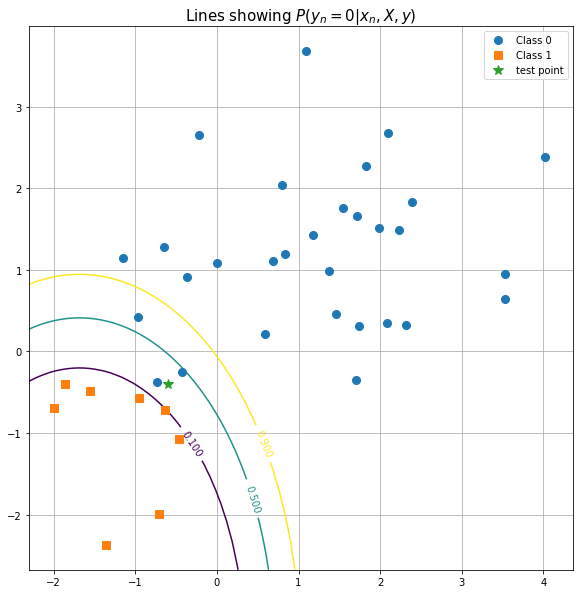

In [41]:
# Define and train the model
model = GaussianNaiveBayes()
model.fit(X_train, y_train)

# Prediction
y_pred_train, _ = model.predict(X_train)
print("Train accuracy: %.3f %%" %(np.mean(y_pred_train == y_train)*100))
y_pred_test,y_pred_prob_test = model.predict(X_test)
print("Predicted test class: %d, (prob %.2f)" %(y_pred_test, y_pred_prob_test[0,y_pred_test]))

# Plot decision-boundaries
fig, ax = plot_data(X_train, y_train, X_test, title = 'Lines showing $P(y_{n} = 0 | x_{n}, X, y)$')
fig, ax = decision_boundary(model, fig, ax, labels = True)

# 3. SVM (4 pts)


### Excercise 3.1 (2 pts)
The SVM classifier is most often phrased as the constrained optimization problem:
$$
\begin{aligned}
 \underset{w,b}{\arg\min}\ & \frac{1}{2} w^T w \\
 s.t. \quad & t_n(w^T x_n + b) \geq 1, \forall n,
 \end{aligned}
$$
where $t_n \in \{-1,1\}$ are now the associated labels ($y_n = 0 \iff t_n = -1$; $y_n = 1 \iff t_n = 1$).

By moving the constraints into the objective function, we may formulate the problem using the *hinge* loss function:
$$
    J =  \frac{1}{2} w^T w + C\frac{1}{N} \sum_{n=1}^N \max(0, 1 - t_n(w^T x_n + b)),
$$
with $C$ as a regularization parameter.

Even though the *hinge* loss function is not differentiable, it is still a convex function and has subgradients with respect to both $w$ and $b$. Thus, it can still be used for optimization.
Derive the following subgradients:
$$
\frac{\partial J}{\partial w}, \quad
\frac{\partial J}{\partial b}.
$$

#### Your answer here:

### Excercise 3.2 (2 pts)
Here, you will finish a custom implementation of a SVM classifier.

The most important variables stored by the algorithm are:
* `self.C`: Regularization parameter.
* `self.parameters`: Dictionary containing the model parameters $w$ and $b$.

Using the subderivatives derived in Exercise 3.1, complete the unfinished function `grad_cost(self, X_train, t, w, b)`, which should return the cost functions and the derivatives of the cost function w.r.t $w,b$.

Also, finish the function `predict(self, X_test)` using the appropriate prediction strategy for SVM.

In [7]:
class SVM(): 
    """
    Custom implementation of linear SVM.
    """
    def __init__(self, learning_rate, n_iterations, C = 1, print_cost=False):
        """
        Parameter(s):
            learning_rate - Learning rate
            n_iterations  - Number of iterations
            C             - Regularization parameter
        """
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations 
        self.C = C
        self.print_cost = print_cost
        self.parameters = {}
    
    def initialize_parameters(self, n_features): 
        """
        Initialize model parameters with zeros:
            w.shape = (n_features, 1)
            b.shape = (1,)
        --------------------
        Input(s):
            n_features - Number of features 
        --------------------
        Output(s):
        """

        w = np.zeros(shape = (n_features,1))
        b = 0

        self.parameters["w"] = w
        self.parameters["b"] = b

    
    def grad_cost(self, X_train, t, w, b):
        """
        Computes the cost function (hinge loss) and 
        partial derivatives of cost w.r.t the model parameters.
        --------------------
        Input(s):
            X_train - Data of size(n_samples, n_features)
            t       - Labels (-1 or 1) of size (n_samples,)
            w,b     - Model parameters
        --------------------
        Output(s):
            cost  - hinge loss
            grads - Gradients of loss function w.r.t model parameters (dw,db). 
        """
        n_samples = X_train.shape[0]
        
        ### TODO - Change this part
        # Dummy variables currently
        cost = 0
        dw = 0
        db = 0
        ### 
        
        grads = {"dw": dw,
                 "db": db}

        return cost, grads
        
    def fit(self, X_train, y_train): 
        """
        Optimize model parameters by running a gradient descent algorithm.
        --------------------
        Input(s):
            X_train - Data of size (n_samples, n_features)
            y_train - True labels of size (n_samples,1)
        --------------------
        Output(s)
        """
        n_features = X_train.shape[1]
        
        # Change the binary targets from (0,1) to (-1,1)
        t = np.where(y_train < 0.5, -1, 1)
        
        # Initialize parameters
        self.params = self.initialize_parameters(n_features)
        
        # Gradient descent
        w = self.parameters["w"] 
        b = self.parameters["b"] 
        for i in range(1,self.n_iterations+1):
            cost, grads = self.grad_cost(X_train, t, w, b)
            dw = grads["dw"]
            db = grads["db"]

            w -= self.learning_rate * dw
            b -= self.learning_rate * db 
            
            if self.print_cost and i % 100 == 0:
                print("Cost after iteration %i: %f" %(i, cost))

        self.parameters = {"w": w,
                           "b": b}   
        
        return self

    def predict(self, X_test):
        """
        Binary prediction of test data.
        --------------------
        Input(s):
            X   - Data of size (n_samples, n_features)
        --------------------
        Output(s)
            y_pred - Predicted labels (0/1) of size (n_samples,1)
        """
        
        w = self.parameters["w"]
        b = self.parameters["b"]
        
        n_samples = X_test.shape[0]
        y_pred = np.zeros((n_samples,1))
        
        ### TODO - Change this part
        for i in range(n_samples):
            y_pred[i] = -1 # Always predicts class 0 currently
        ###    
        
        # Converts the binary targets from (-1,1) to (0,1)
        y_pred = (y_pred > 0).astype(np.int32)
        
        return y_pred.squeeze()

#### Run the code below after finishing the above implementation (no need to change anything).
Make sure that you understand the plot and that your implementation produces sensible results.

Cost after iteration 100: 0.000000
Cost after iteration 200: 0.000000
Cost after iteration 300: 0.000000
Cost after iteration 400: 0.000000
Cost after iteration 500: 0.000000
Cost after iteration 600: 0.000000
Cost after iteration 700: 0.000000
Cost after iteration 800: 0.000000
Cost after iteration 900: 0.000000
Cost after iteration 1000: 0.000000
Train accuracy: 78.947 %
Predicted test class: 0


<ipython-input-8-61603ec2ad8f>:22: RuntimeWarning: invalid value encountered in true_divide
  ax.plot(x, (-b-w[0]*x)/w[1], '-r')


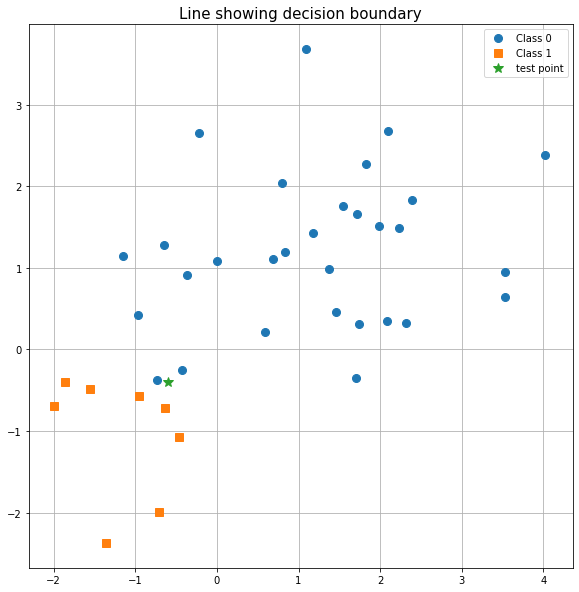

In [8]:
# Parameters (feel free to change)
learning_rate = 0.01
n_iterations = 1000
C = 1
print_cost = True

# Define and train the model
model = SVM(learning_rate, n_iterations, C, print_cost)
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
print("Train accuracy: %.3f %%" %(np.mean(y_pred_train == y_train)*100))
y_pred_test = model.predict(X_test)
print("Predicted test class: %d" %(y_pred_test))

# Plot decision-boundaries
fig, ax = plot_data(X_train, y_train, X_test, title = 'Line showing decision boundary')
w = model.parameters['w']
b = model.parameters['b']
x = np.linspace(-3,3)
ax.plot(x, (-b-w[0]*x)/w[1], '-r')

# 4. Logistic Regression (2 pts)

### Excercise 4.1 (2 pts)
The last classifier that we will look at is Logistic Regression. Here you will finish a custom implementation of the Logistic Regression classifier using the following information:

* The activation is computed as 
$$
A = \sigma(X w + b) = [a_1, \ldots, a_N]^T,
$$
where $\sigma(z)$ is the sigmoid-function.

* The cost function is the negative log-likelihood:
$$
J = -\frac{1}{N}\sum_{n=1}^{N}y_n\log(a_n)+(1-y_n)\log(1-a_n).
$$

* Derivatives w.r.t the model parameters:
$$
 \frac{\partial J}{\partial w} = \frac{1}{N}X^T(A-Y), \qquad
\frac{\partial J}{\partial b} = \frac{1}{N} \sum_{n=1}^N (a_n-y_n).
$$

Finish the implementation of `grad_cost(self, X_train, y_train, w, b)`, which once again should return the cost functions and the derivatives of the cost function w.r.t $w,b$.

Also, finish the function `predict(self, X_test)` using the appropriate prediction strategy for Logistic Regression.

In [9]:
class LogisticRegression(): 
    """
    Custom implementation of (binary) Logistic Regression.
    """
    def __init__(self, learning_rate, n_iterations, print_cost=False):
        """
        Parameter(s):
            learning_rate - Learning rate
            n_iterations  - Number of iterations
        """
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations 
        self.print_cost = print_cost
        self.parameters = {}
    
    def initialize_parameters(self, n_features): 
        """
        Initialize model parameters with zeros:
            w.shape = (n_features,)
            b.shape = (1,)
        --------------------
        Input(s):
            n_features - Number of features 
        --------------------
        Output(s):
        """
        
        w = np.zeros(shape = (n_features,1))
        b = 0
        
        self.parameters['w'] = w
        self.parameters['b'] = b
        
    def sigmoid(self, z):
        """
        Sigmoid function
        --------------------
        Input(s):
            z - 
        --------------------
        Output(s):
            s - sigmoid(z)
        """
        s = 1 / (1 + np.exp(-z))
        return s
    
    def grad_cost(self, X_train, y_train, w, b):
        """
        Computes the cost function (negative log-likelihood) and 
        partial derivatives of cost w.r.t the model parameters.
        --------------------
        Input(s):
            X_train - Data of size(n_samples, n_features)
            y_train - True labels of size (n_samples,1)
            w,b     - Model parameters
        --------------------
        Output(s):
            cost  - Negative log-likelihood cost
            grads - Gradients of loss function w.r.t model parameters (dw,db). 
        """
        n_samples = X_train.shape[0]
        
        y_train = y_train.reshape(-1,1)
        
        ### TODO - Change this part
        # Dummy variables currently
        A = 0
        cost = 0
        dw = 0
        db = 0
        ###

        grads = {"dw": dw,
                 "db": db}
        
        return cost, grads
        
    def fit(self, X_train, y_train): 
        """
        Optimize model parameters by running a gradient descent algorithm.
        --------------------
        Input(s):
            X_train - Data of size (n_samples, n_features)
            y_train - True labels of size (n_samples,1)
        --------------------
        Output(s)
        """
        n_features = X_train.shape[1]
        
        # Initialize parameters
        self.params = self.initialize_parameters(n_features)
        
        # Gradient descent
        w = self.parameters["w"] 
        b = self.parameters["b"] 
        for i in range(1,self.n_iterations+1):
            cost, grads = self.grad_cost(X_train, y_train, w, b)
            dw = grads["dw"]
            db = grads["db"]

            w -= self.learning_rate * dw
            b -= self.learning_rate * db 
            
            if self.print_cost and i % 100 == 0:
                print("Cost after iteration %i: %f" %(i, cost))

        self.parameters = {"w": w,
                           "b": b}   
        
        return self

    def predict(self, X_test):
        """
        Binary prediction of test data.
        --------------------
        Input(s):
            X   - Data of size (n_samples, n_features)
        --------------------
        Output(s)
            y_pred - Predicted labels (0/1) of size (n_samples,)
        """
        
        w = self.parameters["w"]
        b = self.parameters["b"]
        
        n_samples = X_test.shape[0]
        y_pred = np.zeros((n_samples,1))
        
        ### TODO - Change this part
        A = np.zeros((n_samples,1))                
        for i in range(n_samples):
            y_pred[i] = 0 # Always predicts class 0 currently
        ###
        
        return y_pred.squeeze(), A

#### Run the code below after finishing the above implementation (no need to change anything).
Make sure that you understand the plot and that your implementation produces sensible results.

Cost after iteration 100: 0.000000
Cost after iteration 200: 0.000000
Cost after iteration 300: 0.000000
Cost after iteration 400: 0.000000
Cost after iteration 500: 0.000000
Cost after iteration 600: 0.000000
Cost after iteration 700: 0.000000
Cost after iteration 800: 0.000000
Cost after iteration 900: 0.000000
Cost after iteration 1000: 0.000000
Train accuracy: 78.947 %
Predicted test class: 0, (prob 1.00)


<ipython-input-1-e0a78ad535d1>:43: UserWarning: No contour levels were found within the data range.
  contours = ax.contour(X1,X2,Z, levels=levels)


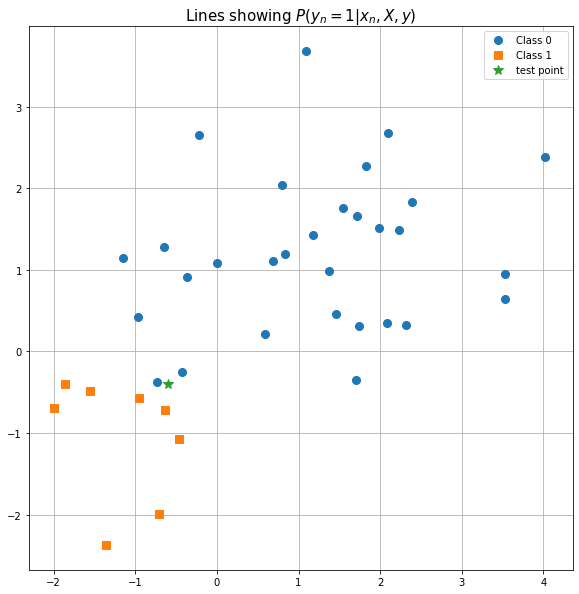

In [10]:
# Parameters (feel free to change)
learning_rate = 0.05
n_iterations = 1000
print_cost = True

# Define and train the model
model = LogisticRegression(learning_rate, n_iterations, print_cost)
model.fit(X_train, y_train)

# Predictions
y_pred_train, _ = model.predict(X_train)
print("Train accuracy: %.3f %%" %(np.mean(y_pred_train == y_train)*100))
y_pred_test,y_pred_prob_test = model.predict(X_test)
print("Predicted test class: %d, (prob %.2f)" %(y_pred_test, np.where(y_pred_prob_test < 0.5, 1-y_pred_prob_test, y_pred_prob_test)))

# Plot decision-boundaries
fig, ax = plot_data(X_train, y_train, X_test, title = 'Lines showing $P(y_{n} = 1 | x_{n}, X, y)$')
fig, ax = decision_boundary(model, fig, ax, labels = True)

# 5. (0 pts)

Finally, lets apply all four of our implemented classifiers to a real world dataset about breast cancer. The [UCI ML Breast Cancer Wisconsin (Diagnostic)](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) dataset contains characteristics of the cell nuclei, which can be used to predict whether a tumor is malignant or benign.

First, lets import the dataset and split it into a train- and test set.

In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the breast cancer dataset
X,y = load_breast_cancer(return_X_y=True)
X = X[:,:10] # Only looking at the first 10 features (the mean values)
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print('Training set:\t', X_train.shape,  y_train.shape)
print('Test set:\t', X_test.shape,  y_test.shape)

Training set:	 (455, 10) (455,)
Test set:	 (114, 10) (114,)


Now we set the parameters for all of our classifiers and train each one of them and report the average train- and test accuracy.

In [12]:
# Parameters (feel free to change)
learning_rate = 0.05
n_iterations = 1000
C = 10
print_cost = False
K = 5

# Define all models
models = {"KNN":K_Nearest_Neighbors(n_neighbors = K),
          "SVM":SVM(learning_rate, n_iterations, C, print_cost),
          "LR":LogisticRegression(learning_rate, n_iterations, print_cost),
          "GNB":GaussianNaiveBayes()}

# Train all models and report performance
for name, model in models.items():
    print(name)
    model.fit(X_train, y_train)
    if name == "SVM":
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
    else:
        y_pred_train,_ = model.predict(X_train)
        y_pred_test,_ = model.predict(X_test)   
    print("\tTrain accuracy: %.3f %%" %(np.mean(y_pred_train == y_train)*100))
    print("\tTest accuracy: %.3f %%" %(np.mean(y_pred_test == y_test)*100))

KNN
	Train accuracy: 96.484 %
	Test accuracy: 91.228 %
SVM
	Train accuracy: 36.264 %
	Test accuracy: 41.228 %
LR
	Train accuracy: 36.264 %
	Test accuracy: 41.228 %
GNB
[-1.15800874 -0.40948202 -1.1351621  -0.97862472  0.30883801 -0.58903063
 -0.79961752 -0.8039764   0.28616595  0.07263664]
prior: {0: 0.3626373626373626, 1: 0.6373626373626373}
[0.03489515 0.26507328 0.0338772  0.07953491 0.44352722 0.15674439
 0.07956496 0.05561665 0.40214012 0.37657325]
0: [0.00478677 0.04156625 0.00495385 0.01542157 0.05703189 0.0367644
 0.01824903 0.01717521 0.05309531 0.05953726]
[-0.94499809  0.62606285 -0.95474903 -0.83897928 -0.59425145 -0.88903255
 -0.66113619 -0.89967207  0.74618482 -0.4291952 ]
prior: {0: 0.3626373626373626, 1: 0.6373626373626373}
[0.05615111 0.48428104 0.05132274 0.09836029 0.21784    0.09703872
 0.10430783 0.04441469 0.38596412 0.35541548]
0: [0.01204052 0.04436225 0.01114491 0.02770856 0.0317446  0.01809233
 0.0262016  0.01177418 0.03347324 0.05046233]
[ 0.57163772 -1.03080

 0.12937714 0.11358069 0.40254936 0.28320205]
0: [0.04527024 0.0175883  0.04499233 0.06271878 0.03453275 0.03142762
 0.03346117 0.0384349  0.04234954 0.03194548]
[-0.84559312 -1.44502689 -0.86907341 -0.77640902  0.08395521 -1.00842687
 -0.86603332 -0.80113906  0.06710934 -0.24774188]
prior: {0: 0.3626373626373626, 1: 0.6373626373626373}
[0.06890927 0.02861843 0.06170569 0.10762153 0.40963289 0.07806319
 0.06929936 0.05597893 0.37960462 0.37258049]
0: [0.0170521  0.002159   0.01535257 0.03423385 0.05932638 0.01239997
 0.01488861 0.01735084 0.05607702 0.05695242]
[ 0.27626295  0.63537112  0.21793597  0.16470453 -0.41277957 -0.63546176
 -0.45536021 -0.40184821 -0.71419254 -0.84455319]
prior: {0: 0.3626373626373626, 1: 0.6373626373626373}
[0.32457757 0.48334045 0.30853794 0.28246572 0.2732513  0.1464516
 0.14939939 0.12618005 0.20596605 0.28524784]
0: [0.02277003 0.04380977 0.02392225 0.01818344 0.04187079 0.0336924
 0.03835657 0.04041951 0.02862871 0.02946913]
[ 1.27883307  1.35443486  1.

 0.28641157 0.29883351 0.37583748 0.3734878 ]
0: [1.40730457e-05 5.70472271e-02 8.13597288e-06 6.68519467e-08
 2.90193830e-02 1.24592024e-02 2.38002410e-05 2.70342852e-09
 5.60455205e-02 5.73257113e-02]
[-0.27188444 -0.24891439 -0.31671283 -0.33443548 -1.5443101  -0.84146434
 -0.5048268  -0.52153229 -1.30564537 -1.03592974]
prior: {0: 0.3626373626373626, 1: 0.6373626373626373}
[0.18126778 0.32369102 0.16548908 0.18540002 0.03343778 0.10537834
 0.1376836  0.10100236 0.08506238 0.24458935]
0: [0.0455695  0.0507476  0.04449524 0.06197379 0.00201756 0.02071465
 0.03560121 0.03544488 0.00699091 0.02035423]
[-0.35424856  2.24104744 -0.39003138 -0.39984984 -1.07675315 -0.87368185
 -0.33709238 -0.65746658 -0.89673971 -0.81053069]
prior: {0: 0.3626373626373626, 1: 0.6373626373626373}
[0.16135372 0.04855259 0.14811931 0.17280219 0.09715211 0.09968156
 0.17943439 0.07674649 0.16296247 0.29213996]
0: [0.04406142 0.00015271 0.0426867  0.0626972  0.01030135 0.01891797
 0.0438759  0.0268961  0.020127

 0.08986076 0.06596347 0.17377093 0.25840187]
0: [0.04228615 0.06000944 0.04318669 0.04959086 0.00774741 0.01417551
 0.02161214 0.02210864 0.02221615 0.02322449]
[-0.68654517 -0.89351198 -0.69772218 -0.66719548  1.32650383 -0.5975588
 -0.6119207  -0.42351516  0.72062821  0.32071735]
prior: {0: 0.3626373626373626, 1: 0.6373626373626373}
[0.09346161 0.1146186  0.08698226 0.12495661 0.28307878 0.15482783
 0.11420102 0.12135902 0.38908165 0.35626356]
0: [0.02667987 0.0149524  0.02570796 0.04590572 0.01026255 0.03620221
 0.02919443 0.03977699 0.03476795 0.05311869]
[-0.19236047 -0.23029785 -0.22115156 -0.28381045  0.41558617 -0.43002772
 -0.61593829 -0.54474688 -0.63387179 -0.80769548]
prior: {0: 0.3626373626373626, 1: 0.6373626373626373}
[0.20137896 0.33044091 0.18946686 0.19530423 0.45027235 0.19436877
 0.1133719  0.09653326 0.22583286 0.29270795]
0: [0.04549241 0.05170242 0.0448638  0.05998015 0.05361712 0.04657074
 0.02894941 0.03413748 0.03265497 0.03136706]
[-0.01911181 -0.49092937 -0

 0.15517312 0.18742518 0.37415678 0.27168304]
0: [0.03173269 0.00968647 0.03254848 0.05174322 0.05129612 0.05465811
 0.03959445 0.03827779 0.05600717 0.02909686]
[-0.30596615 -1.26816979 -0.38138144 -0.35349096 -0.91378429 -1.26957826
 -1.05763473 -1.03408451 -1.30929632 -1.07987546]
prior: {0: 0.3626373626373626, 1: 0.6373626373626373}
[0.17290349 0.04695354 0.15011772 0.18170428 0.13193625 0.04599231
 0.04514423 0.03176015 0.08450395 0.23500291]
0: [0.0451361  0.00439114 0.04296439 0.06240583 0.0160496  0.00448882
 0.00742129 0.00618856 0.00691365 0.01849366]
[ 0.09733401  1.32651006  0.15821018  0.00429714 -0.56863189  0.35361595
  0.15192374 -0.25843367  0.22044897  0.08681268]
prior: {0: 0.3626373626373626, 1: 0.6373626373626373}
[0.27839983 0.29002194 0.29249801 0.25229417 0.22549764 0.37816539
 0.31947093 0.16088298 0.39731546 0.37594473]
0: [0.03403357 0.00899308 0.02779044 0.03358011 0.03317053 0.03644498
 0.03971401 0.04122151 0.05457962 0.05935725]
[-1.11540661 -0.42111735 -

 0.04710786 0.03540274 0.03818192 0.02823598]
[ 0.67388283 -0.23262492  0.60265244  0.52107059  0.03556271 -0.37260474
 -0.37890044 -0.01468054 -1.15595669 -0.97355516]
prior: {0: 0.3626373626373626, 1: 0.6373626373626373}
[0.4019128  0.32959899 0.39467657 0.33655861 0.3992931  0.20868229
 0.16851024 0.22912951 0.11011478 0.25809692]
0: [0.00507116 0.05158473 0.00560551 0.00221271 0.05887823 0.04953268
 0.04213576 0.03020118 0.01074866 0.02315867]
[-1.0472432  -0.89118491 -1.04413176 -0.92515559  0.63619904 -0.51398277
 -1.03147017 -0.94816476 -0.08623028  0.24133152]
prior: {0: 0.3626373626373626, 1: 0.6373626373626373}
[0.04497025 0.11517921 0.04197114 0.08643851 0.44356887 0.17408222
 0.04799129 0.03945661 0.35393672 0.36484073]
0: [0.00796924 0.01504881 0.00763227 0.01966291 0.04322876 0.04160245
 0.00823987 0.00947886 0.05468638 0.05587567]
[ 0.21093969  0.21417197  0.17097915  0.07397766 -0.03489108 -0.39591506
 -0.25812162  0.01524048 -1.18516424 -0.75382653]
prior: {0: 0.362637

 0.04558266 0.03366773 0.03944933 0.05417763]
[-1.28411104 -0.57004965 -1.24925896 -1.06480103 -0.82198087 -0.22857349
 -0.05749318 -0.67062151  0.81920368  1.19821426]
prior: {0: 0.3626373626373626, 1: 0.6373626373626373}
[0.02571266 0.20876209 0.02555535 0.06920638 0.15443257 0.245558
 0.25858849 0.0746415  0.37578712 0.18743977]
0: [0.00247497 0.03175878 0.0026965  0.00993031 0.02002622 0.05470139
 0.04716416 0.02600043 0.02979475 0.01254571]
[ 1.8497016  -0.45136923  1.76421609  1.93430518 -0.13523435  0.06176317
  0.80227124  1.04442038 -0.878485   -1.13657962]
prior: {0: 0.3626373626373626, 1: 0.6373626373626373}
[0.27060549 0.25000237 0.29754529 0.24105811 0.35620951 0.31866837
 0.43845097 0.4471911  0.16708388 0.22261179]
0: [4.39211862e-07 3.90088360e-02 4.27127614e-07 2.15018032e-11
 5.47740379e-02 5.25187053e-02 6.77674640e-03 5.07741075e-05
 2.09191508e-02 1.62440867e-02]
[-0.3769697  -0.42577149 -0.36737677 -0.41691445 -1.13297385 -0.29168192
 -0.18706048 -0.20865129 -0.86

[0.17916119 0.48196847 0.18292485 0.18517883 0.19175677 0.32444606
 0.34561076 0.13664942 0.15969888 0.36229171]
0: [0.04548706 0.05826236 0.04499293 0.06200461 0.02687976 0.05156778
 0.03443797 0.04133766 0.01950612 0.05296352]
[ 0.577318    0.5236719   0.58617636  0.44058249  0.31595455  0.45595394
  0.19461064  0.18599664  1.27192067 -0.55110915]
prior: {0: 0.3626373626373626, 1: 0.6373626373626373}
[0.38779638 0.49048484 0.39189238 0.32646778 0.44417512 0.39299578
 0.33136457 0.28983795 0.28140516 0.33862499]
0: [0.00788931 0.05013977 0.00606858 0.00389459 0.05684658 0.0296856
 0.03744611 0.01688175 0.01111713 0.04474622]
[-1.24662117 -1.70333134 -1.26573504 -1.04204821 -0.27471862 -1.20002633
 -1.11487284 -1.26181958  0.33362821  0.20163861]
prior: {0: 0.3626373626373626, 1: 0.6373626373626373}
[0.02820819 0.01275415 0.02450583 0.07183799 0.31563701 0.05332977
 0.03937659 0.01708415 0.40453136 0.36841908]
0: [0.00303786 0.00065781 0.00245473 0.0112193  0.04898994 0.00603546
 0.005